# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio



## Importing necessary libraries

In [ ]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
CCUsers = pd.read_csv('/content/drive/MyDrive/Project_CreditCard/BankChurners.csv')
# returns the first 5 rows
CCUsers.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

## Data Overview

In [ ]:
CCUsers.shape

(10127, 21)

Dataset has 10,127 rows and 21 columns

In [ ]:
CCUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
CCUsers.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
round(CCUsers.isnull().sum() / CCUsers.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* We have 6 categorical variables and 15 numericals
* Education_level have 15% and Marital_Status have 7.4% of missing values both are categorical variables.
* We will impute these values after we split the data into train, validation and test sets.


In [ ]:
CCUsers.duplicated().sum()

0

There are no duplicates entries.

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(CCUsers[column].value_counts(1))
    print("-" * 50)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
F   0.529
M   0.471
Name: Gender, dtype: float64
--------------------------------------------------
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64
--------------------------------------------------
Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64
--------------------------------------------------
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64
--------------------------------------------------
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64
--------------------------------------------------


* The categories are divided consistently
* Income category has 11% of rows with a text 'abc' that needs to be replaced and will be imputed after we split the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks( rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    # Adding tab2 to have percentages
    tab2=tab1.copy()
    a = tab2.values
    tab2.iloc[:,0:2] = a[:,0:2]/a[:,2, None]
    tab2.drop(["All"], axis=1, inplace=True)
    print(tab2)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
## Remove CLIENTUM for the EDA
CCUsers.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Change nulls and 'abc' for Unknown for EDA
CCUsers["Education_Level"].fillna("Unknown", inplace = True)
CCUsers["Marital_Status"].fillna("Unknown", inplace = True)
CCUsers["Income_Category"].replace("abc","Unknown", inplace=True)

In [ ]:
CCUsers.describe().T

count     mean      std      min      25%  \
Customer_Age             10127.000   46.326    8.017   26.000   41.000   
Dependent_count          10127.000    2.346    1.299    0.000    1.000   
Months_on_book           10127.000   35.928    7.986   13.000   31.000   
Total_Relationship_Count 10127.000    3.813    1.554    1.000    3.000   
Months_Inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
Contacts_Count_12_mon    10127.000    2.455    1.106    0.000    2.000   
Credit_Limit             10127.000 8631.954 9088.777 1438.300 2555.000   
Total_Revolving_Bal      10127.000 1162.814  814.987    0.000  359.000   
Avg_Open_To_Buy          10127.000 7469.140 9090.685    3.000 1324.500   
Total_Amt_Chng_Q4_Q1     10127.000    0.760    0.219    0.000    0.631   
Total_Trans_Amt          10127.000 4404.086 3397.129  510.000 2155.500   
Total_Trans_Ct           10127.000   64.859   23.473   10.000   45.000   
Total_Ct_Chng_Q4_Q1      10127.000    0.712    0.238    0.000    0.582   
Avg_Utilization_Ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
Customer_Age               46.000    52.000    73.000  
Dependent_count             2.000     3.000     5.000  
Months_on_book             36.000    40.000    56.000  
Total_Relationship_Count    4.000     5.000     6.000  
Months_Inactive_12_mon      2.000     3.000     6.000  
Contacts_Count_12_mon       2.000     3.000     6.000  
Credit_Limit             4549.000 11067.500 34516.000  
Total_Revolving_Bal      1276.000  1784.000  2517.000  
Avg_Open_To_Buy          3474.000  9859.000 34516.000  
Total_Amt_Chng_Q4_Q1        0.736     0.859     3.397  
Total_Trans_Amt          3899.000  4741.000 18484.000  
Total_Trans_Ct             67.000    81.000   139.000  
Total_Ct_Chng_Q4_Q1         0.702     0.818     3.714  
Avg_Utilization_Ratio       0.176     0.503     0.999

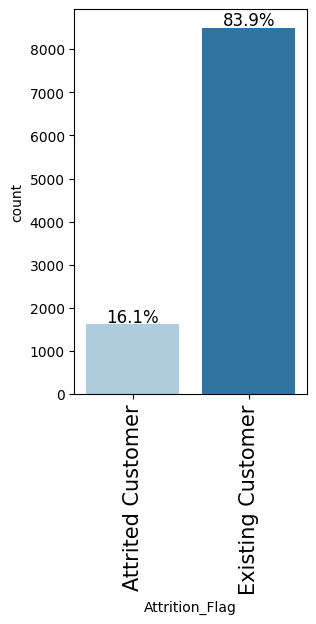

In [ ]:
labeled_barplot(CCUsers,'Attrition_Flag',True)

Attrited Customers are only 16.1% off all the customers

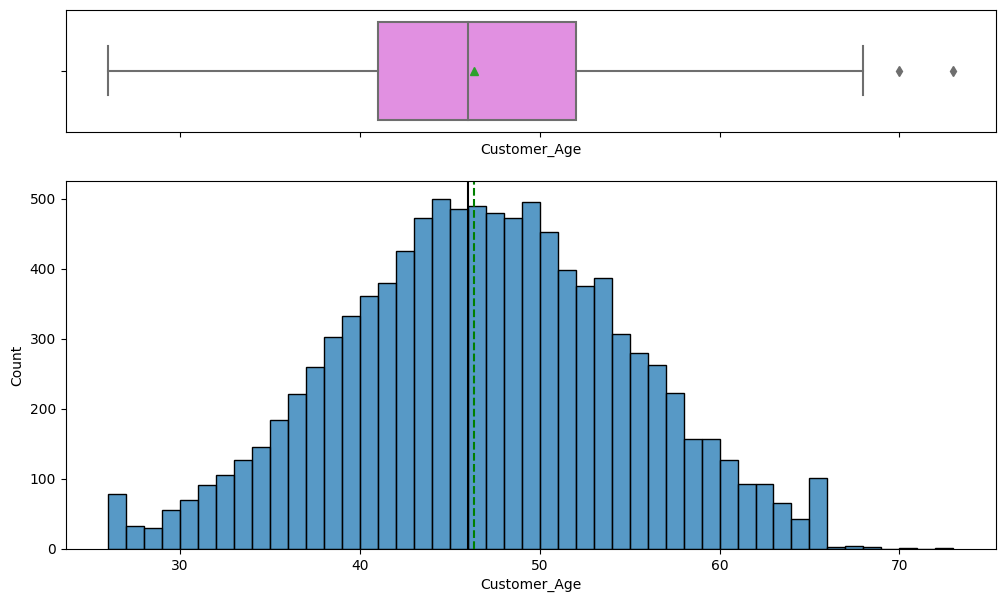

In [ ]:
histogram_boxplot(CCUsers, 'Customer_Age')

Customer Age have a normal distribution with a mean in 46.3 and a range between 26 and 73

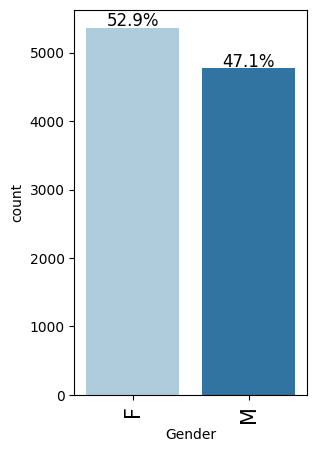

In [ ]:
labeled_barplot(CCUsers,'Gender',True)

The distribution of gender is balanced

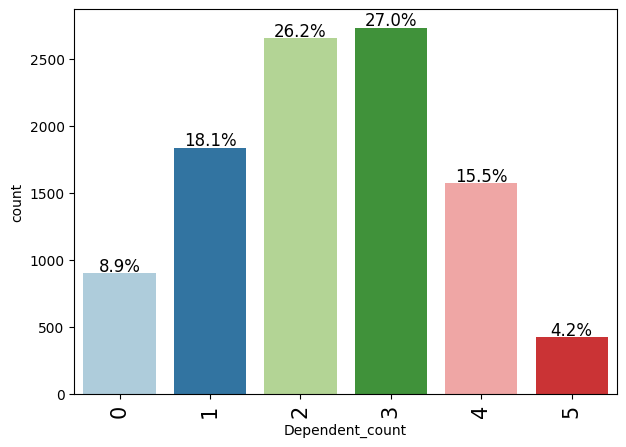

In [ ]:
labeled_barplot(CCUsers,'Dependent_count',True)

Dependent count has a normal distribution with a mean of 2.3

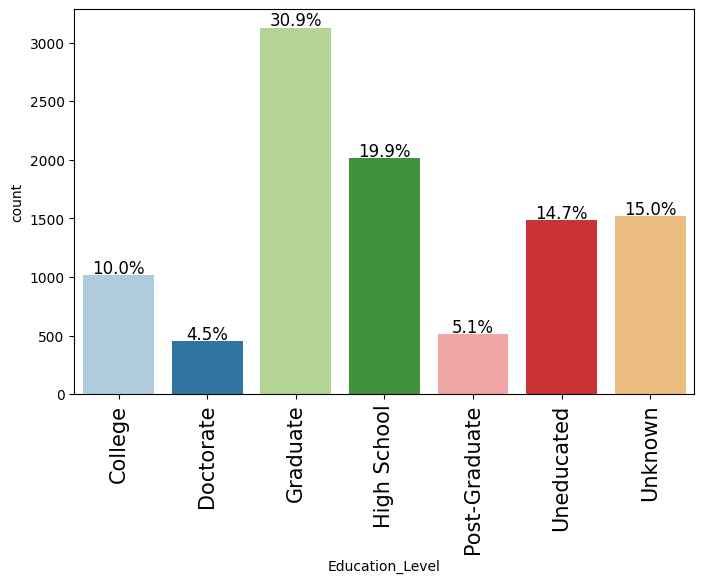

In [ ]:
labeled_barplot(CCUsers,'Education_Level',True)

Graduate and High School are the top categories with more than 50%, 15% are unknown.

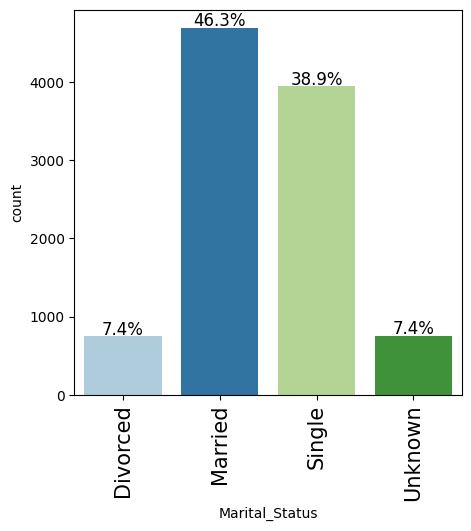

In [ ]:
labeled_barplot(CCUsers,'Marital_Status',True)

Married and single are the top categories with 85% and only 7.4 are unknown

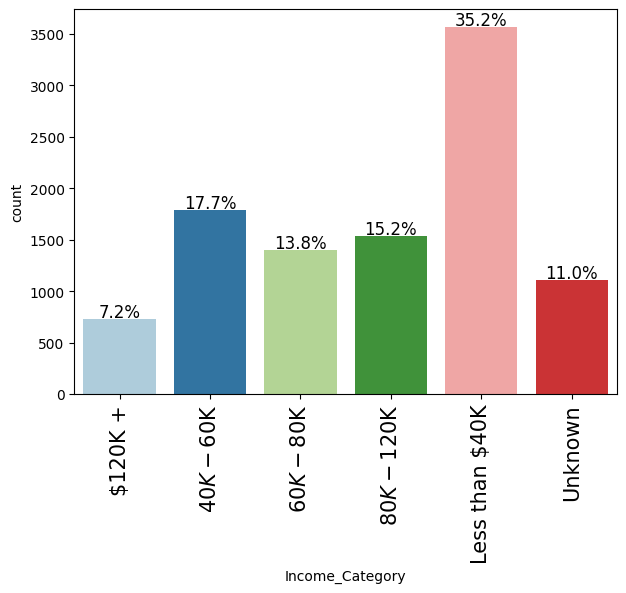

In [ ]:
labeled_barplot(CCUsers,'Income_Category',True)

The majority of our customers fall into the 'Less than $40K' category, along with the '40K-60K' category, together comprising almost 53% of our entire customer base. The 'Unknown' category accounts for 11%.

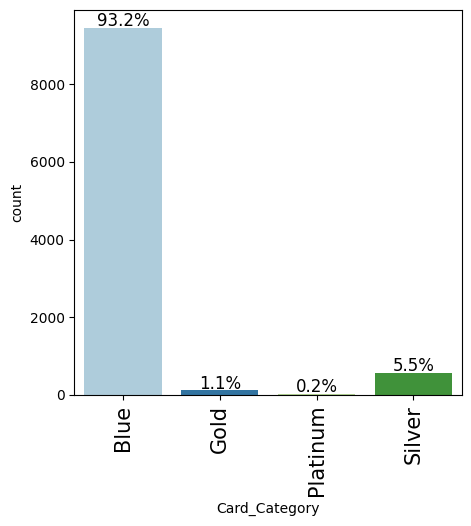

In [ ]:
labeled_barplot(CCUsers,'Card_Category',True)

Almost all our customers have Blue as a card category

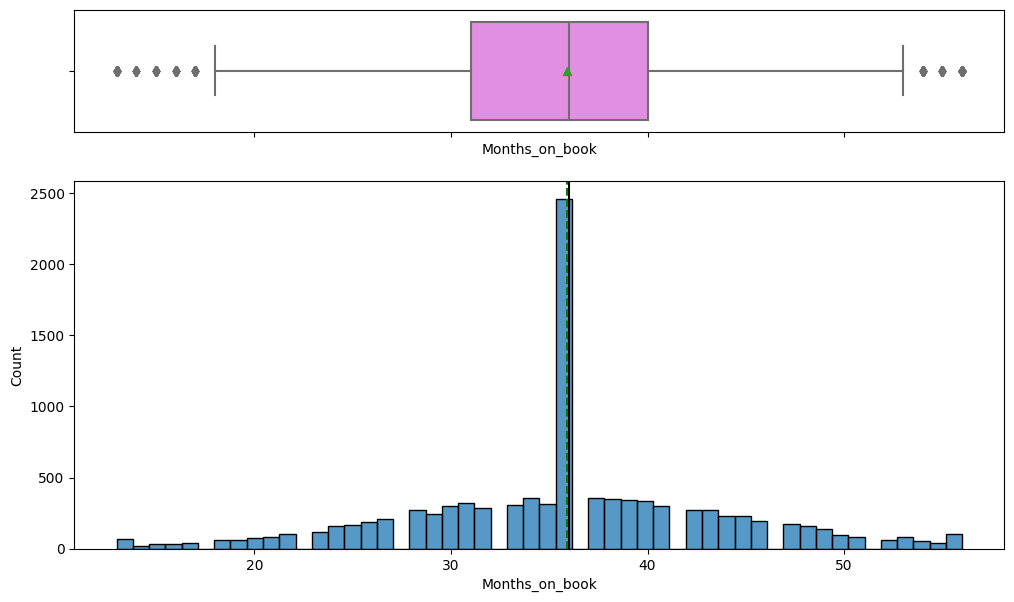

In [ ]:
histogram_boxplot(CCUsers, 'Months_on_book')

Months on book are very concentrated on the mean around 36, so we can assume the average relation with the bank is 3 years

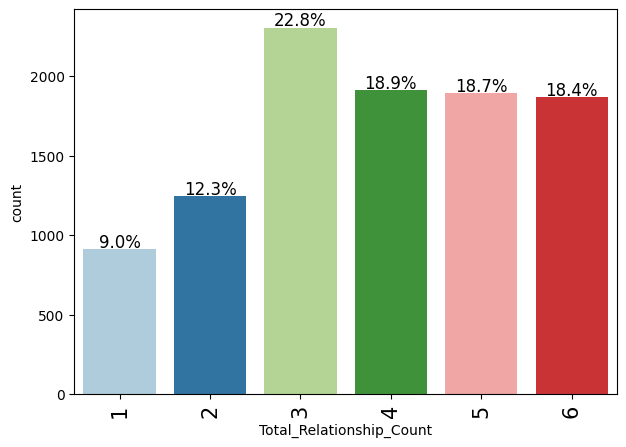

In [ ]:
labeled_barplot(CCUsers,'Total_Relationship_Count',True)

A significant majority, 90%, of our customers have more than two products.

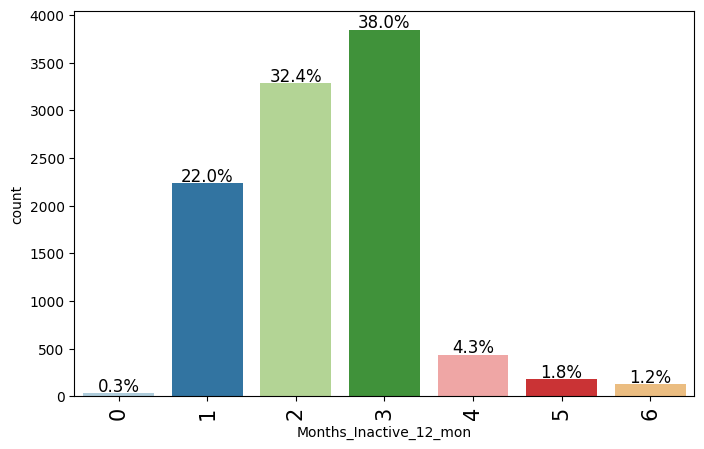

In [ ]:
labeled_barplot(CCUsers, 'Months_Inactive_12_mon', True)

The average of inactive months is 2.3

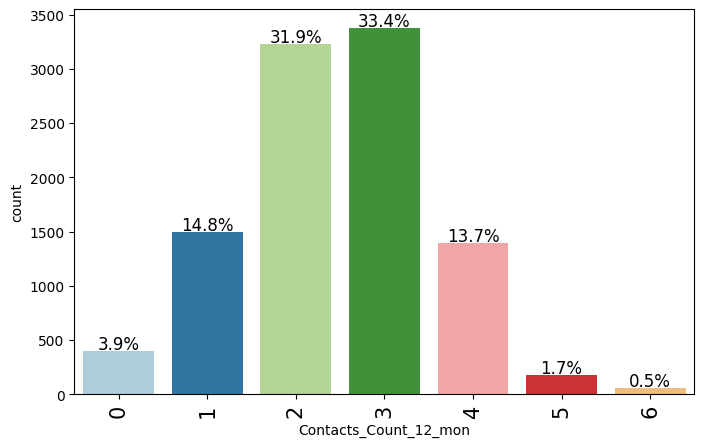

In [ ]:
labeled_barplot(CCUsers, 'Contacts_Count_12_mon', True)

The majority of our customer contacts occur between 2 to 3 mark.

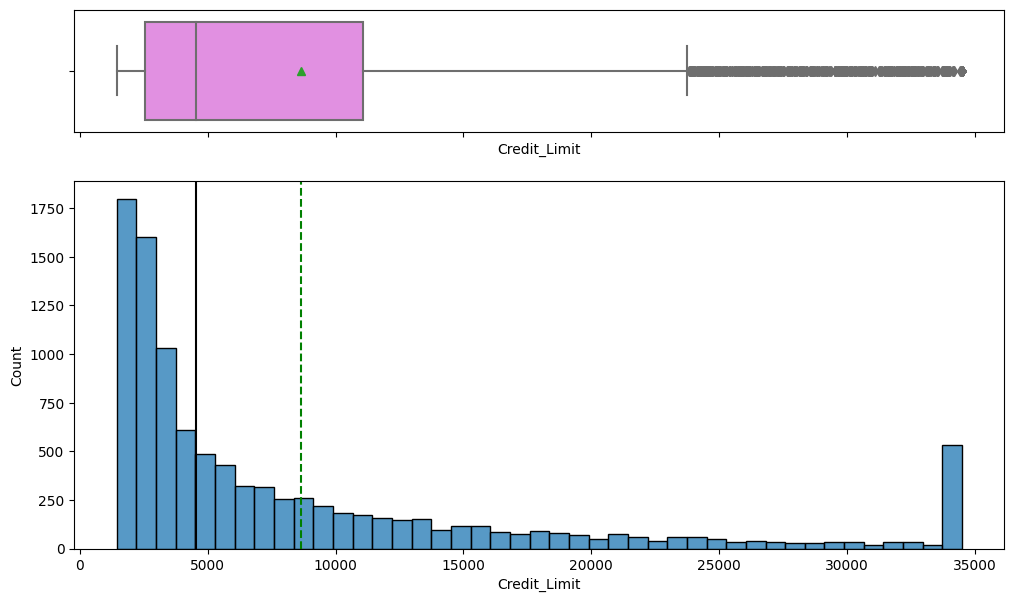

In [ ]:
histogram_boxplot(CCUsers, 'Credit_Limit')


The Credit Limit data is skewed to the right, with several outliers present.

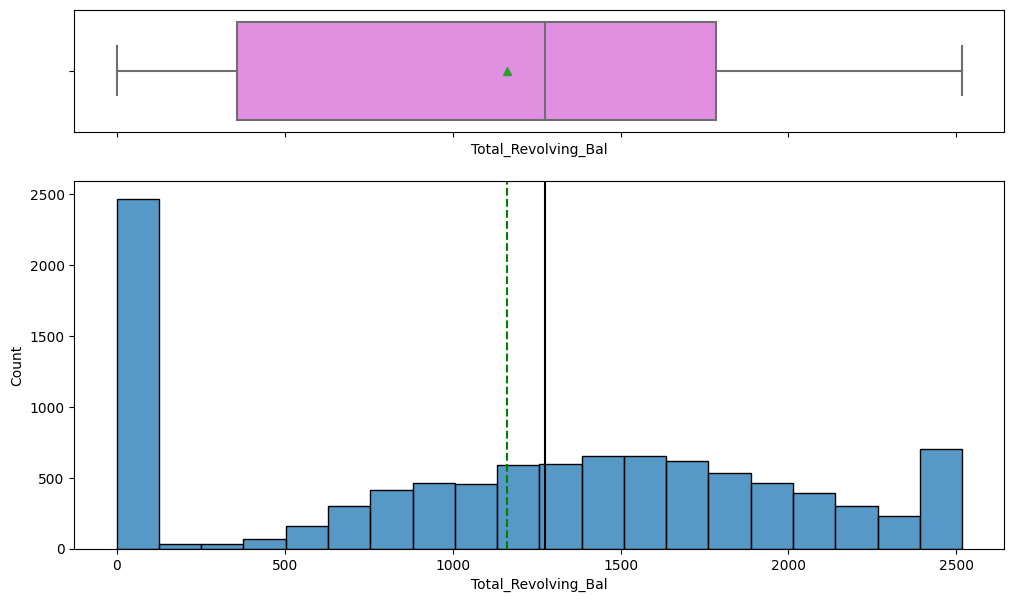

In [ ]:
histogram_boxplot(CCUsers, 'Total_Revolving_Bal')

Revolving balance have a mayor concentrarion between 0 and 100 then a normal distribution

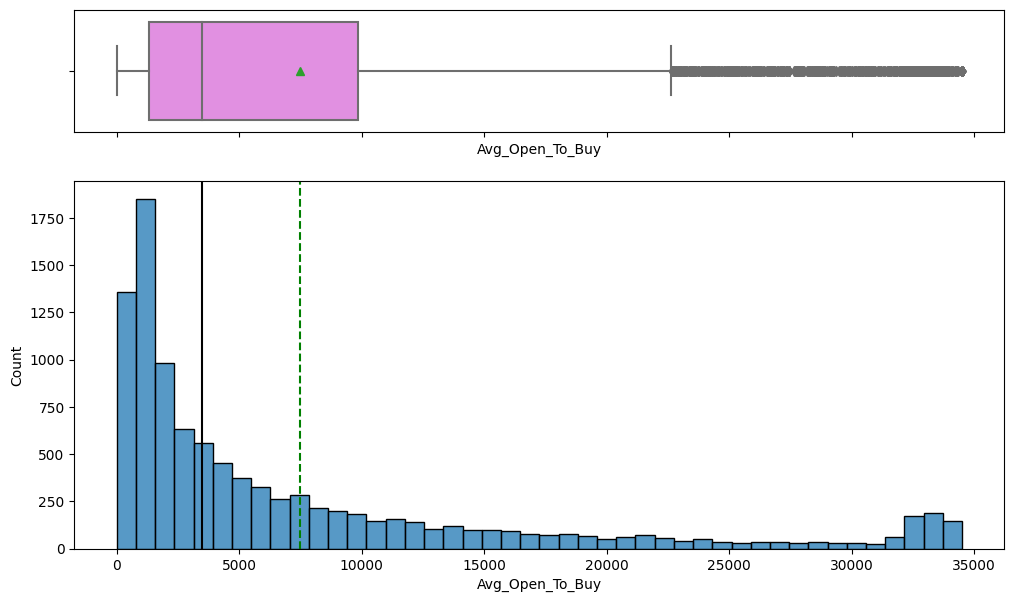

In [ ]:
histogram_boxplot(CCUsers, 'Avg_Open_To_Buy')
## Review Outliers

The Opent to buy average data is skewed to the right, with several outliers present.

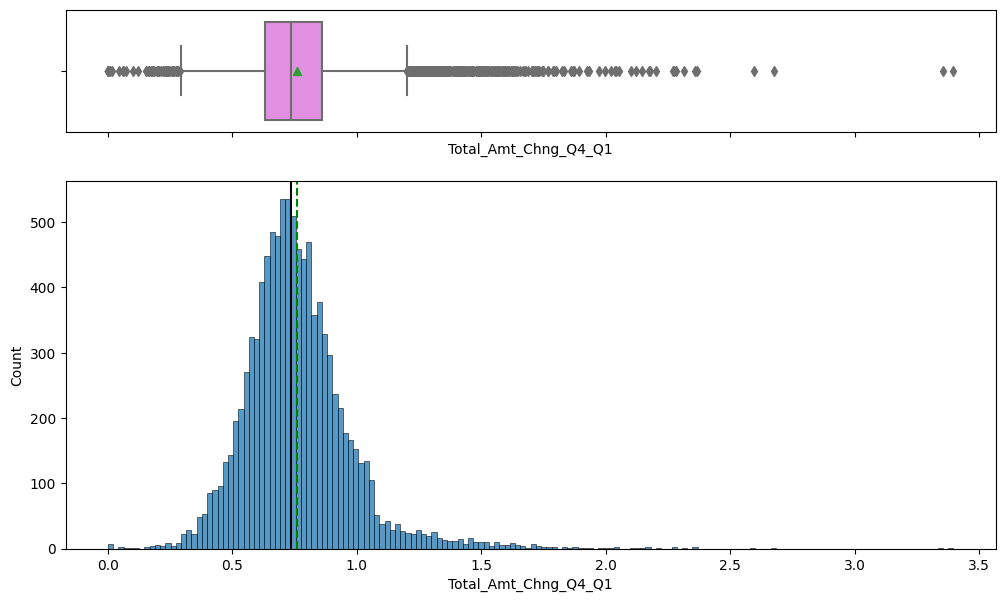

In [ ]:
histogram_boxplot(CCUsers, 'Total_Amt_Chng_Q4_Q1')


Change in transaction amount Q4 over Q1 data shows a normal distribution between 0 and 1.5 with ouliers ocurring from 1.5 to 3.5

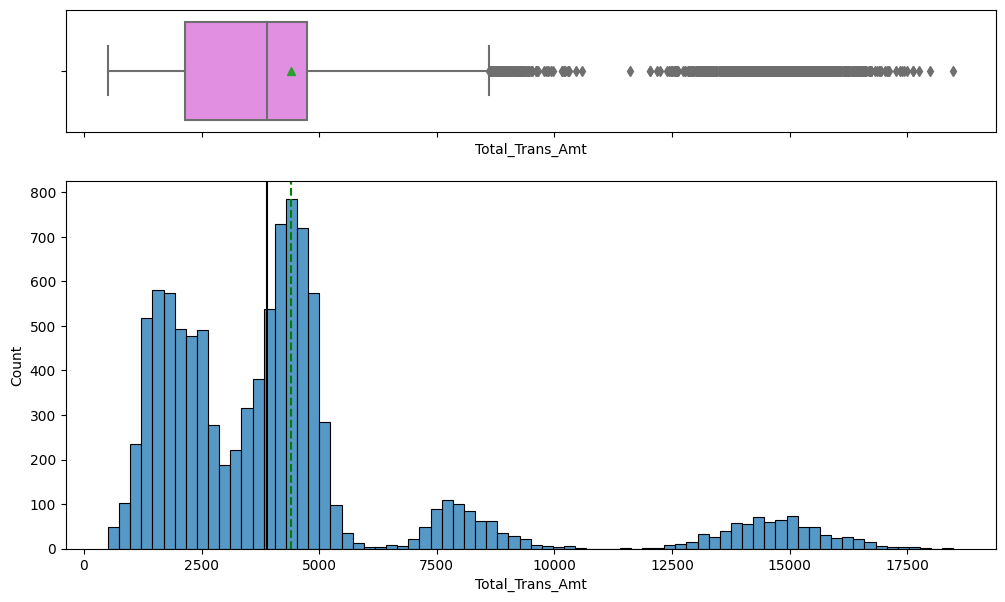

In [ ]:
histogram_boxplot(CCUsers, 'Total_Trans_Amt')


The total transaction amount is primarily concentrated between 510 and 4,741, although outliers extend up to 18,484

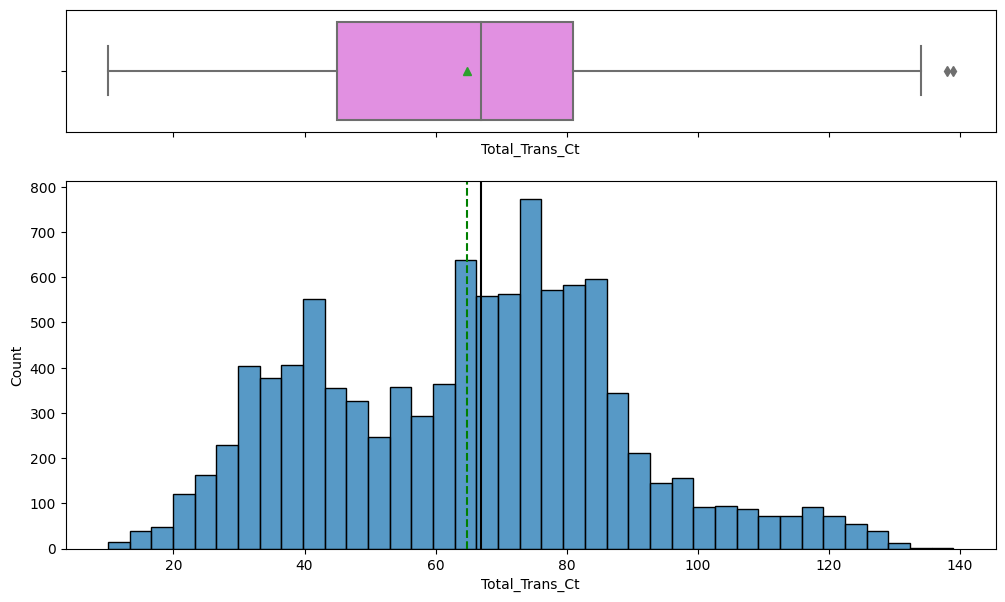

In [ ]:
histogram_boxplot(CCUsers, 'Total_Trans_Ct')

Yearly Transaction Count data has a normal distribution with a mean of 64.8

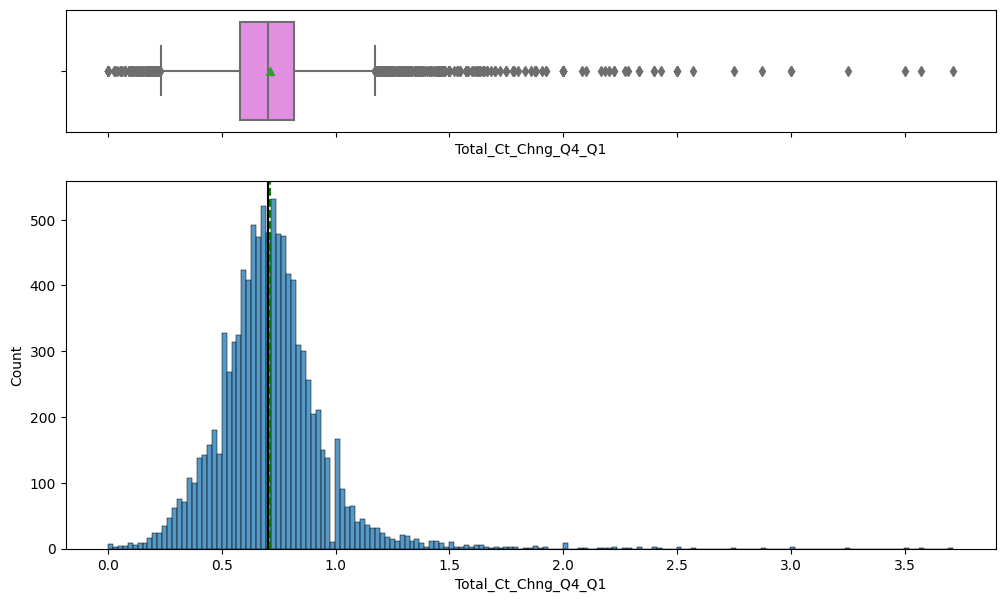

In [ ]:
histogram_boxplot(CCUsers, 'Total_Ct_Chng_Q4_Q1')
##Review Outliers

Total change in transaction count has a normal distribution between 0 and 1.5 but several outliers

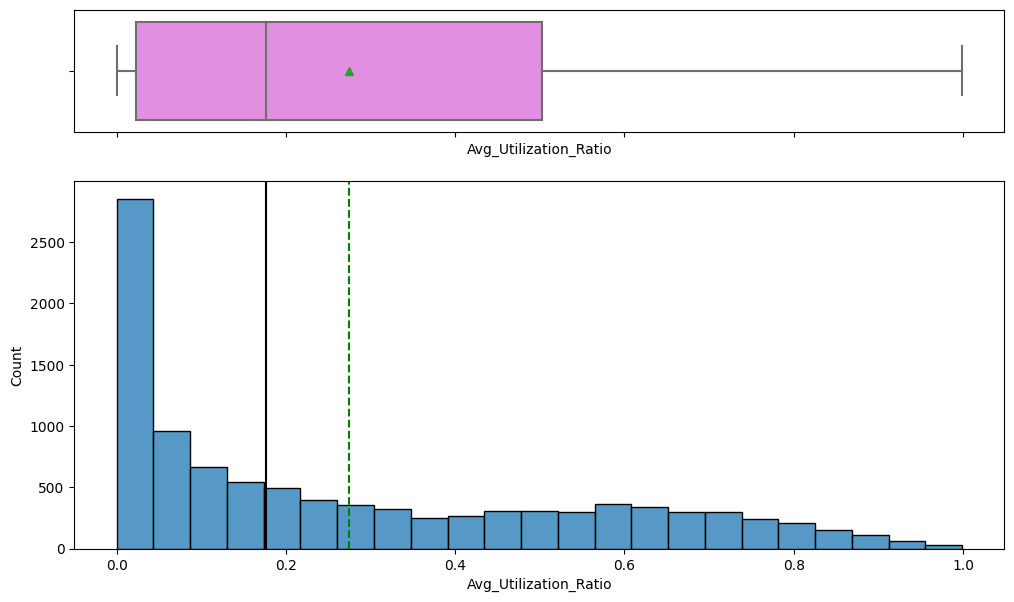

In [ ]:
histogram_boxplot(CCUsers, 'Avg_Utilization_Ratio')

Average utilization radio is skewed to the right with a mean of 0.27

**Univariate Analysis**
* Attrited Customers are only 16.1% off all the customers
* Customer Age have a normal distribution with a mean in 46.3 and a range between 26 and 73
* The distribution of gender is balanced
* Dependent count has a normal distribution with a mean of 2.3
* Graduate and High School are the top categories with more than 50%, 15% are unknown.
* Married and single are the top categories with 85% and only 7.4 are unknown
* The majority of our customers fall into the 'Less than $40K' category, along with the '40K-60K' category, together comprising almost 53% of our entire customer base. The 'Unknown' category accounts for 11%.
* Almost all our customers have Blue as a card category
* Months on book are very concentrated on the mean around 36, so we can assume the average relation with the bank is 3 years
* A significant majority, 90%, of our customers have more than two products.
* The average of inactive months is 2.3
* The majority of our customer contacts occur between 2 to 3 mark.
* The Credit Limit data is skewed to the right, with several outliers present.
* Revolving balance have a mayor concentrarion between 0 and 100 then a normal distribution
* The Opent to buy average data is skewed to the right, with several outliers present.
* Change in transaction amount Q4 over Q1 data shows a normal distribution between 0 and 1.5 with ouliers ocurring from 1.5 to 3.5
* The total transaction amount is primarily concentrated between 510 and 4,741, although outliers extend up to 18,484
* Yearly Transaction Count data has a normal distribution with a mean of 64.8
* Total change in transaction count has a normal distribution between 0 and 1.5 but several outliers.
* Average utilization radio is skewed to the right with a mean of 0.27

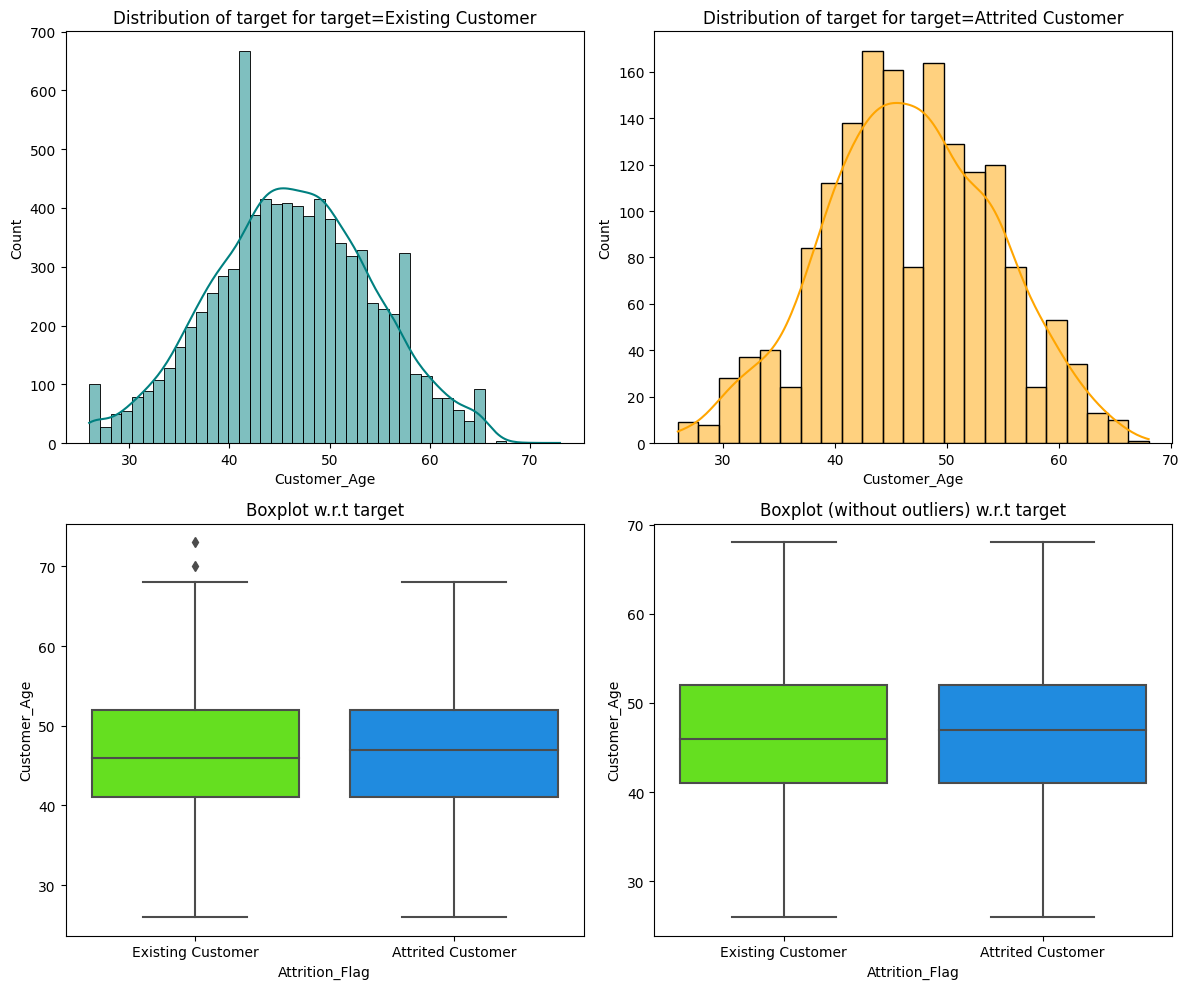

In [ ]:
distribution_plot_wrt_target(CCUsers, "Customer_Age", "Attrition_Flag")

The age among both existing and attrited customers appears to be a normal distribution. We do not observe any specific correlation with attrition.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
All                         0.161              0.839
F                           0.174              0.826
M                           0.146              0.854
------------------------------------------------------------------------------------------------------------------------


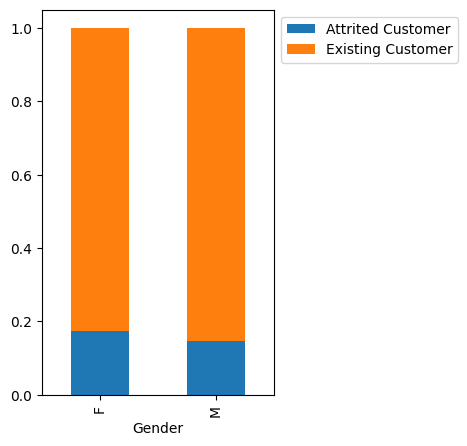

In [ ]:
stacked_barplot(CCUsers, "Gender", "Attrition_Flag")

Attrition rates show a slight discrepancy between genders, with a rate of 17.4% among women and 14.6% among men. This suggests that gender may have a minor influence on attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
All                          0.161              0.839
3                            0.176              0.824
2                            0.157              0.843
1                            0.146              0.854
4     

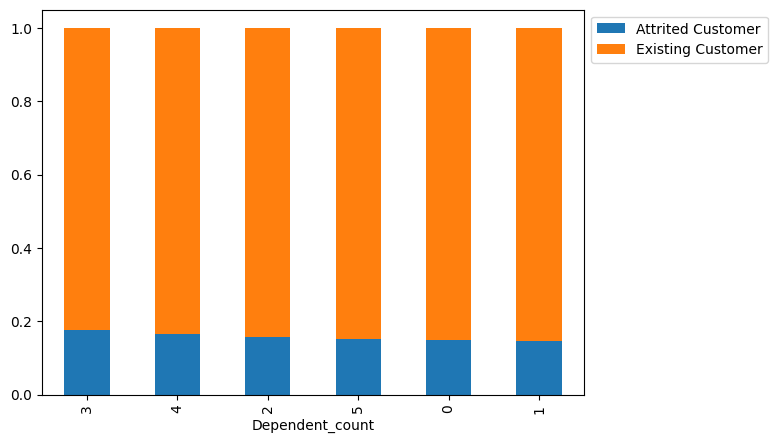

In [ ]:
stacked_barplot(CCUsers, "Dependent_count", "Attrition_Flag")

Attrition rates peak at 17.6% for customers with three dependents, while the variation in rates is relatively minor across all other cases.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       487               2641   3128
High School                    306               1707   2013
Unknown                        256               1263   1519
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
All                          0.161              0.839
Graduate                     0.156              0.844
High School                  0.152              0.848

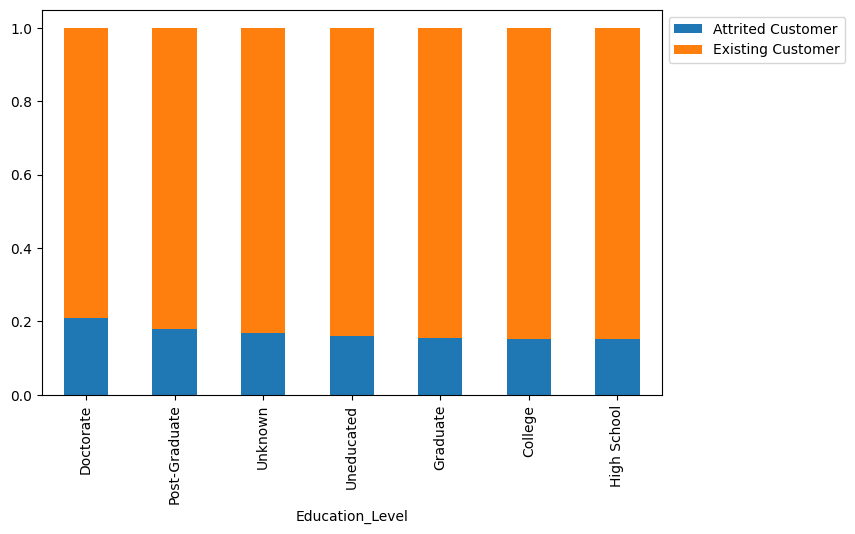

In [ ]:
stacked_barplot(CCUsers, "Education_Level", "Attrition_Flag")

Individuals with doctorate and post-graduate degrees represent the largest categories experiencing attrition, with rates of 21.1% and 17.8% respectively. The attrition rates for the remaining categories fluctuate between 15% and 17%. The attrition rate for the 'Unknown' category is nearly 17%, demonstrating a behavior similar to the rest of the categories.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
All                         0.161              0.839
Married                     0.151              0.849
Single                      0.169              0.831
Unknown                     0.172              0.828
Divorced                    0.162              0.838
----------------------------------------------------------------------------------------

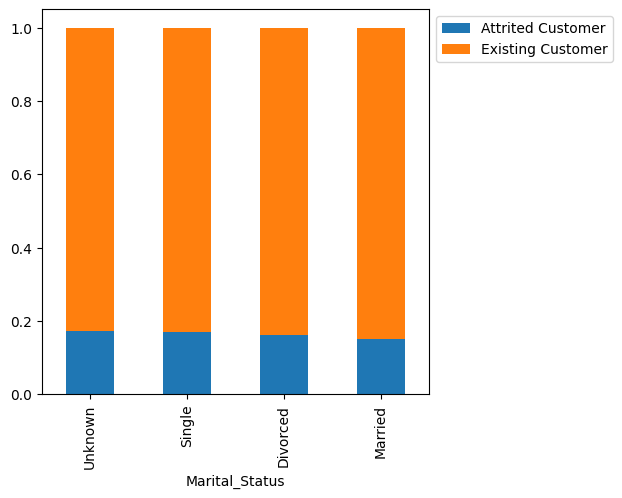

In [ ]:
stacked_barplot(CCUsers, "Marital_Status", "Attrition_Flag")

Individuals classified as 'Single', 'Divorced', and 'Unknown' appear to experience a slightly higher rate of attrition over 16%.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
All                          0.161              0.839
Less than $40K               0.172              0.828
$40K - $60K                  0.151              0.849
$80K - $120K                 0.158              0.842
$60K -

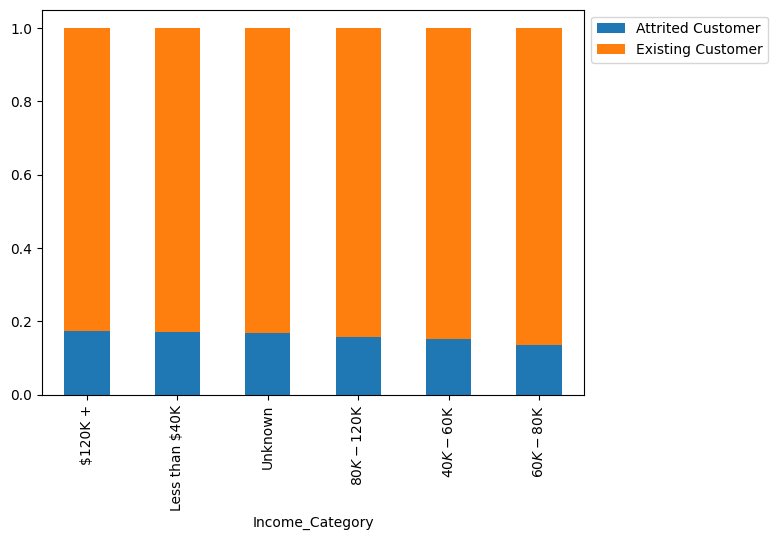

In [ ]:
stacked_barplot(CCUsers, "Income_Category", "Attrition_Flag")

Attrition rates exceed 17% for the income categories 'Less than 40K' and 'More than 120K'. However, the income category '60K - 80K' exhibits the lowest attrition rate at 13.5%.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
All                         0.161              0.839
Blue                        0.161              0.839
Silver                      0.148              0.852
Gold                        0.181              0.819
Platinum                    0.250              0.750
----------------------------------------------------------------------------------------

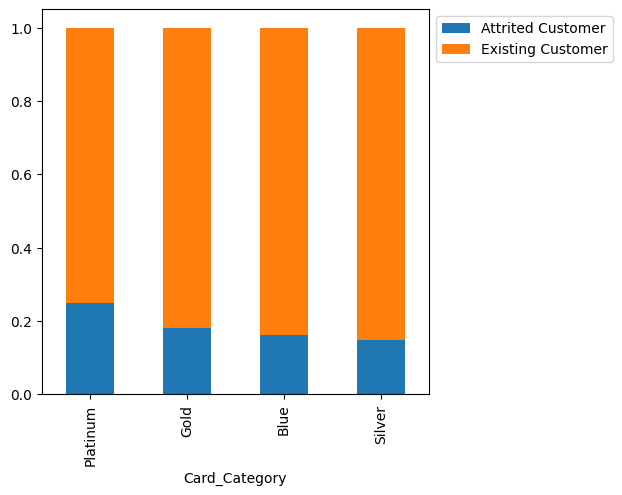

In [ ]:
stacked_barplot(CCUsers, "Card_Category", "Attrition_Flag")

While the 'Platinum' and 'Gold' credit card categories exhibit higher attrition rates, it's important to note that these categories constitute less than 1.3% of the total.

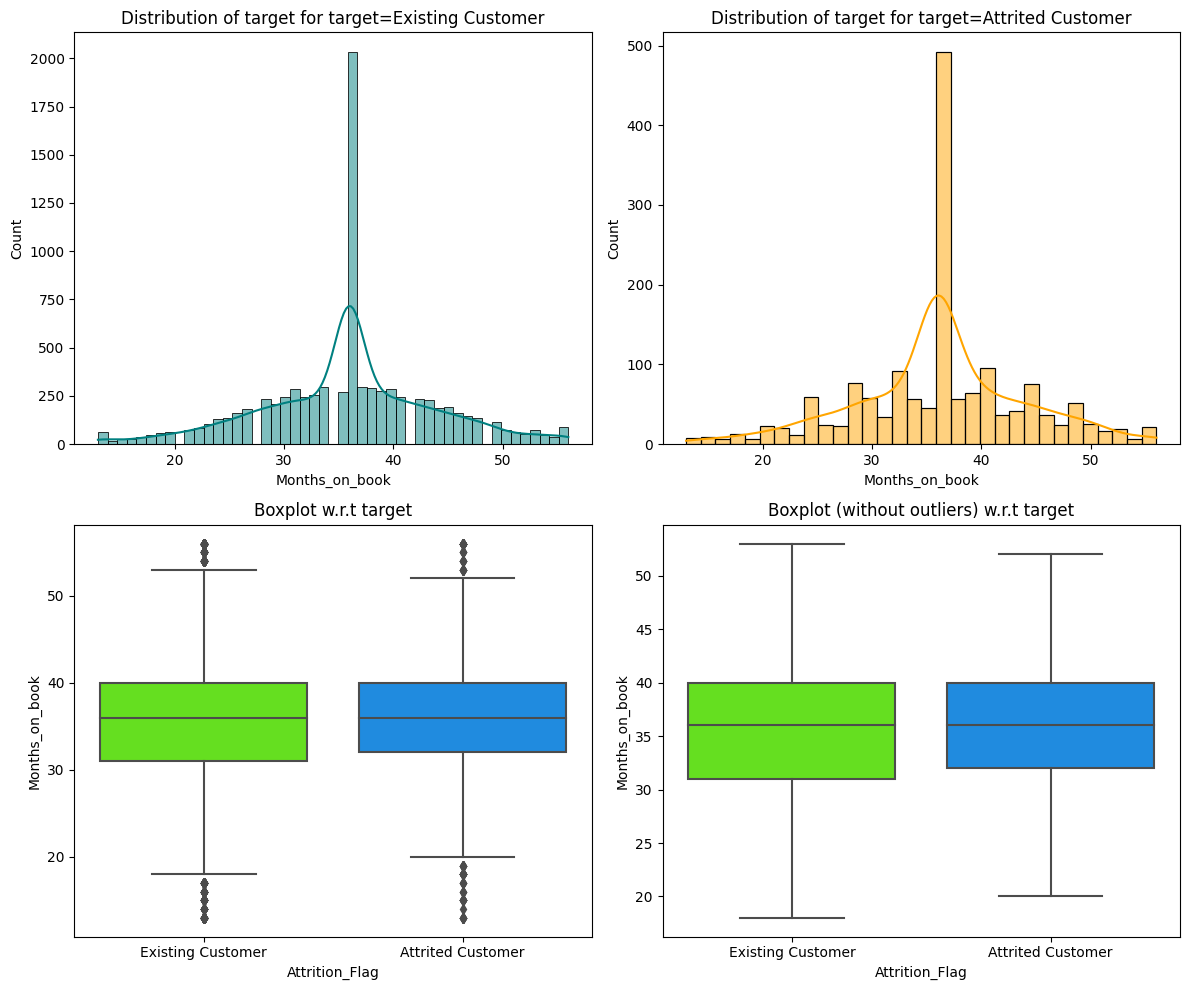

In [ ]:
distribution_plot_wrt_target(CCUsers, "Months_on_book", "Attrition_Flag")

The distribution of 'Months on Book' remains consistent between attrited and existing customers.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
All                                   0.161              0.839
3                                     0.174              0.8

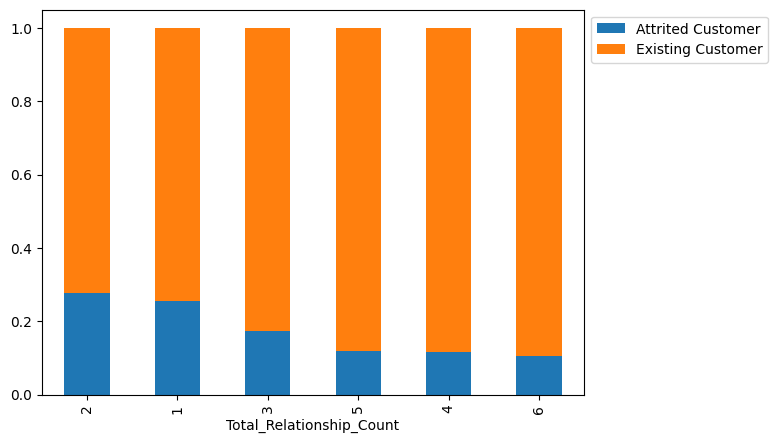

In [ ]:
stacked_barplot(CCUsers, "Total_Relationship_Count", "Attrition_Flag")

Customers with one or two products exhibit an attrition rate higher than 25%, while those with six products show an attrition rate of 10%. The graph indicates a trend where attrition decreases as the number of products a customer has increases.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
All                                 0.161              0.839
3               

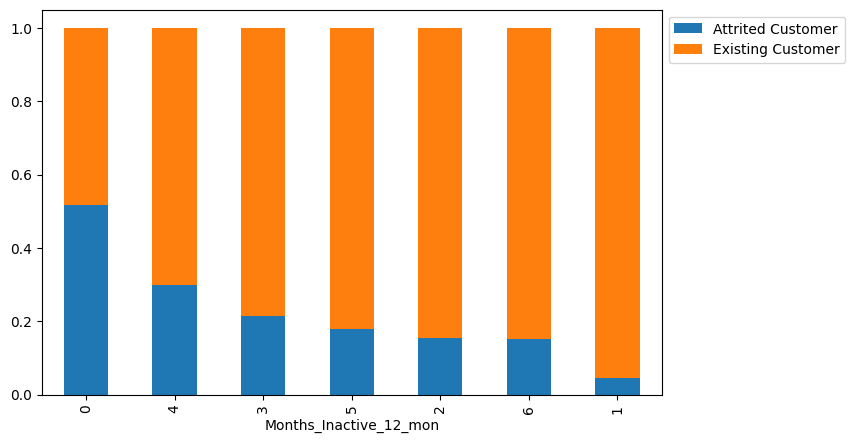

In [ ]:
stacked_barplot(CCUsers, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition is notably high at 51% for customers who have been inactive for less than a month, while it falls to 30% for those inactive for four months and further drops to 4.5% for those inactive for one month. Rather than a consistent trend, these figures seem to reflect specific situations.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
All                                0.161              0.839
3                            

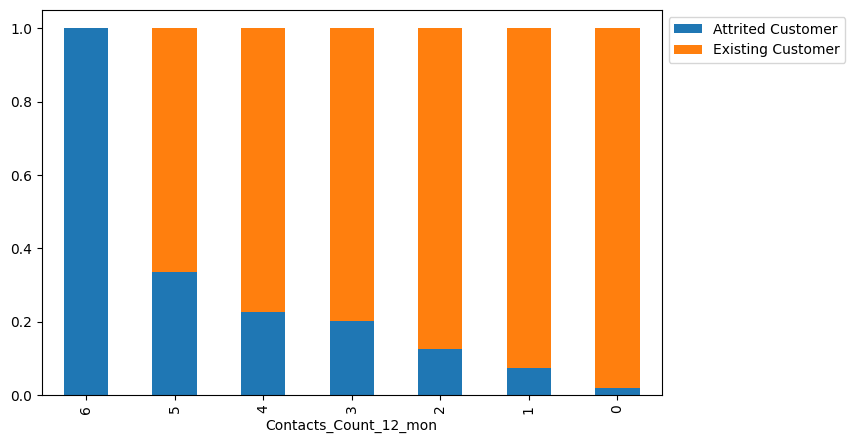

In [ ]:
stacked_barplot(CCUsers, "Contacts_Count_12_mon", "Attrition_Flag")

The number of contacts presents a clear trend. Customers with no contact have an attrition rate of 1.8%, and this rate consistently rises to 100% attrition for customers with more than six contacts. However, it's important to note that customers with six contacts constitute less than 0.5% of the overall customer base.

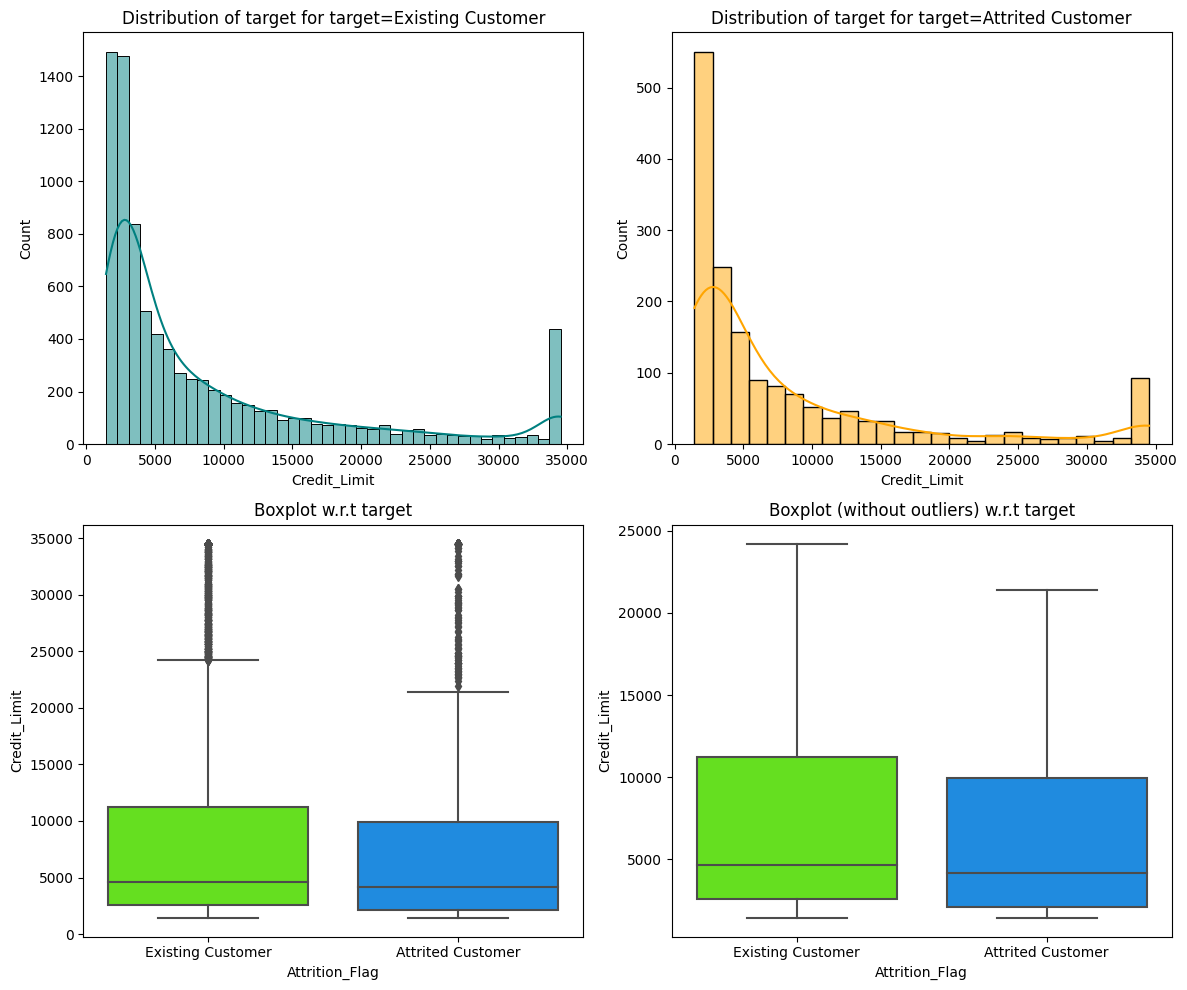

In [ ]:
distribution_plot_wrt_target(CCUsers, "Credit_Limit", "Attrition_Flag")

The credit limit does not demonstrate any significant differences between attrited and existing customers, and it includes several outliers.

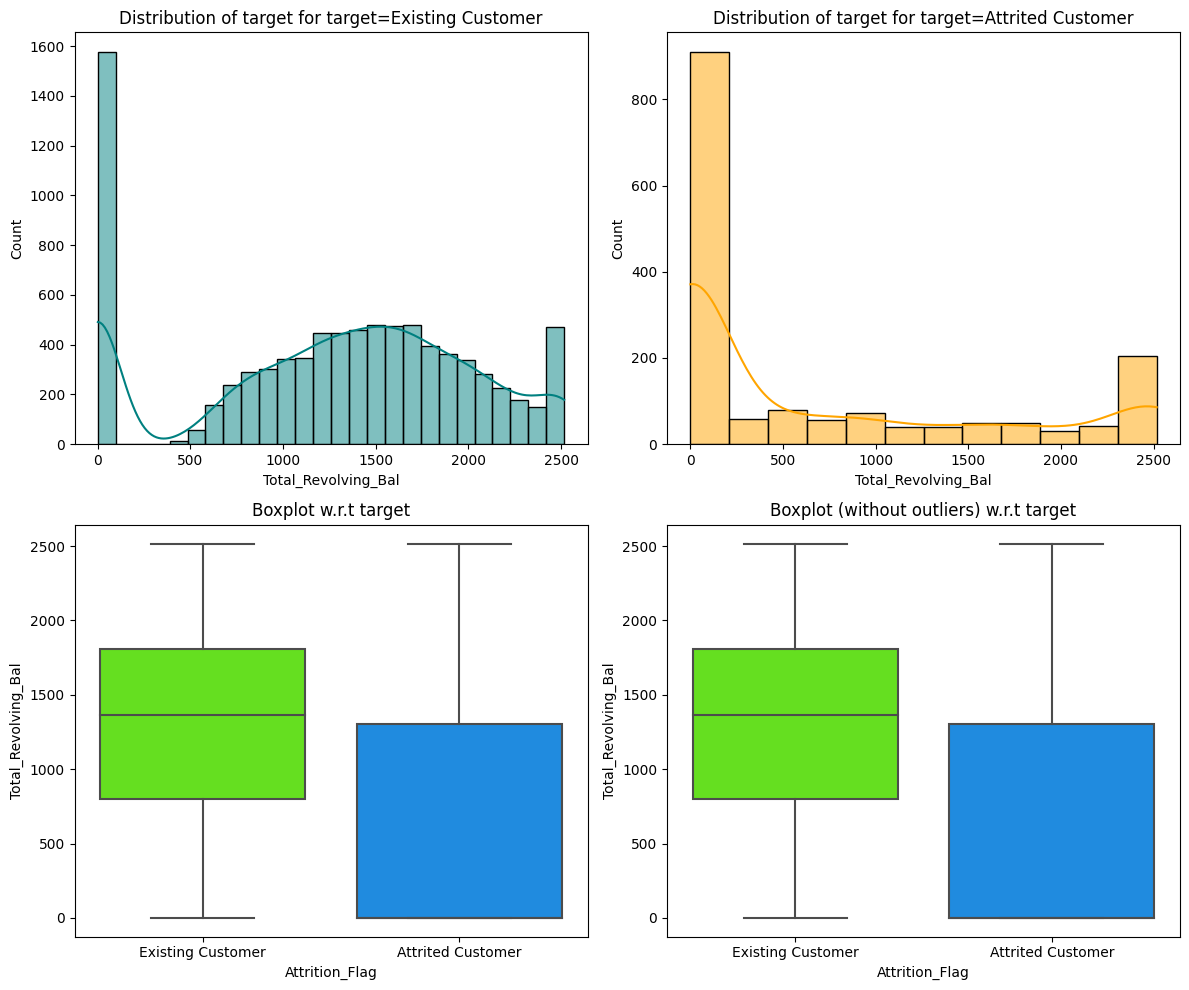

In [ ]:
distribution_plot_wrt_target(CCUsers, "Total_Revolving_Bal", "Attrition_Flag")

The revolving balance of attrited customers is primarily concentrated between 0 and 1500, whereas for existing customers, it's concentrated between 1000 and 2000. This observation indicates a correlation between revolving balance and customer attrition.

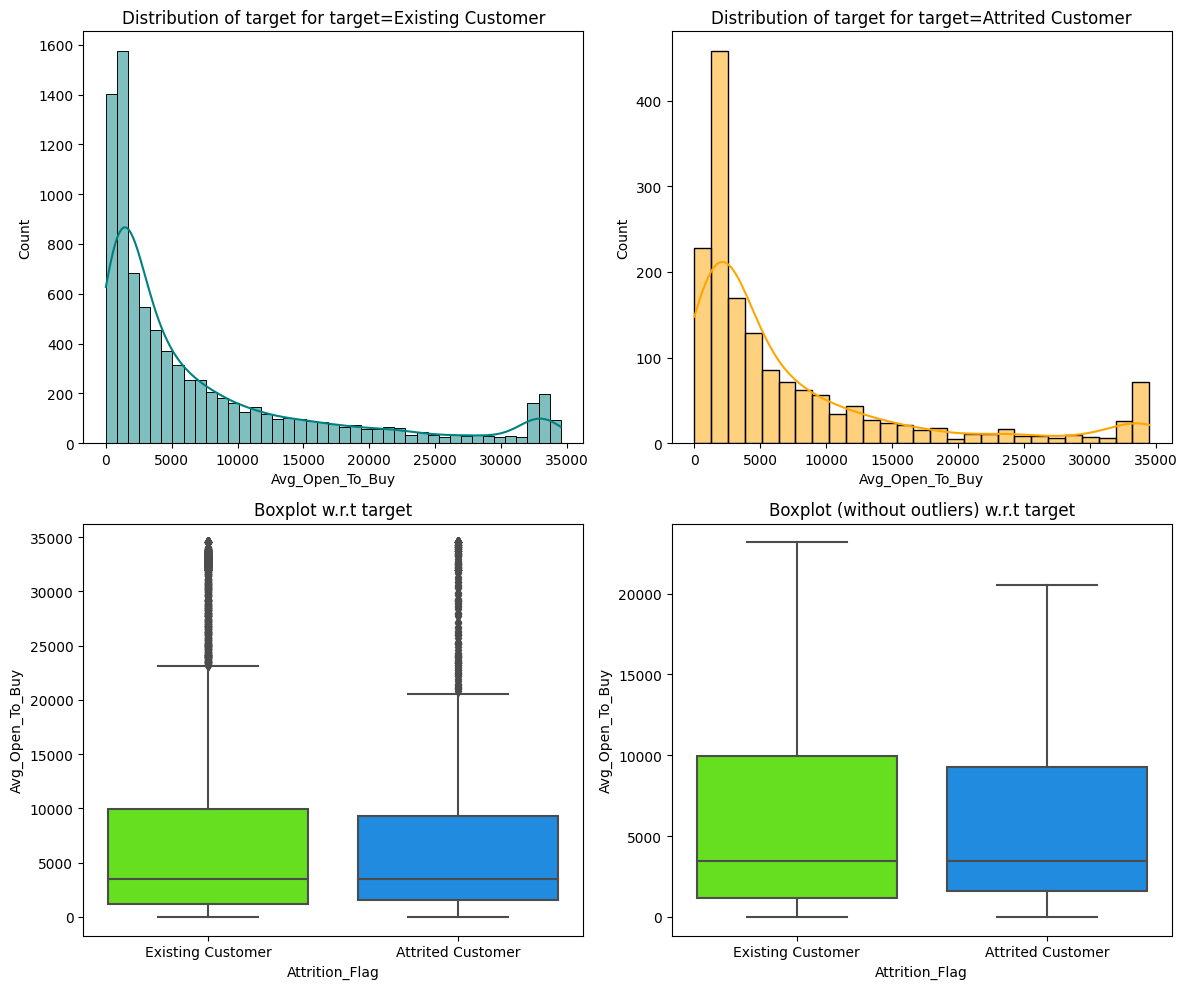

In [ ]:
distribution_plot_wrt_target(CCUsers, "Avg_Open_To_Buy", "Attrition_Flag")

The 'Open to Buy' on the credit line exhibits a similar behavior for both attrited and existing customers.

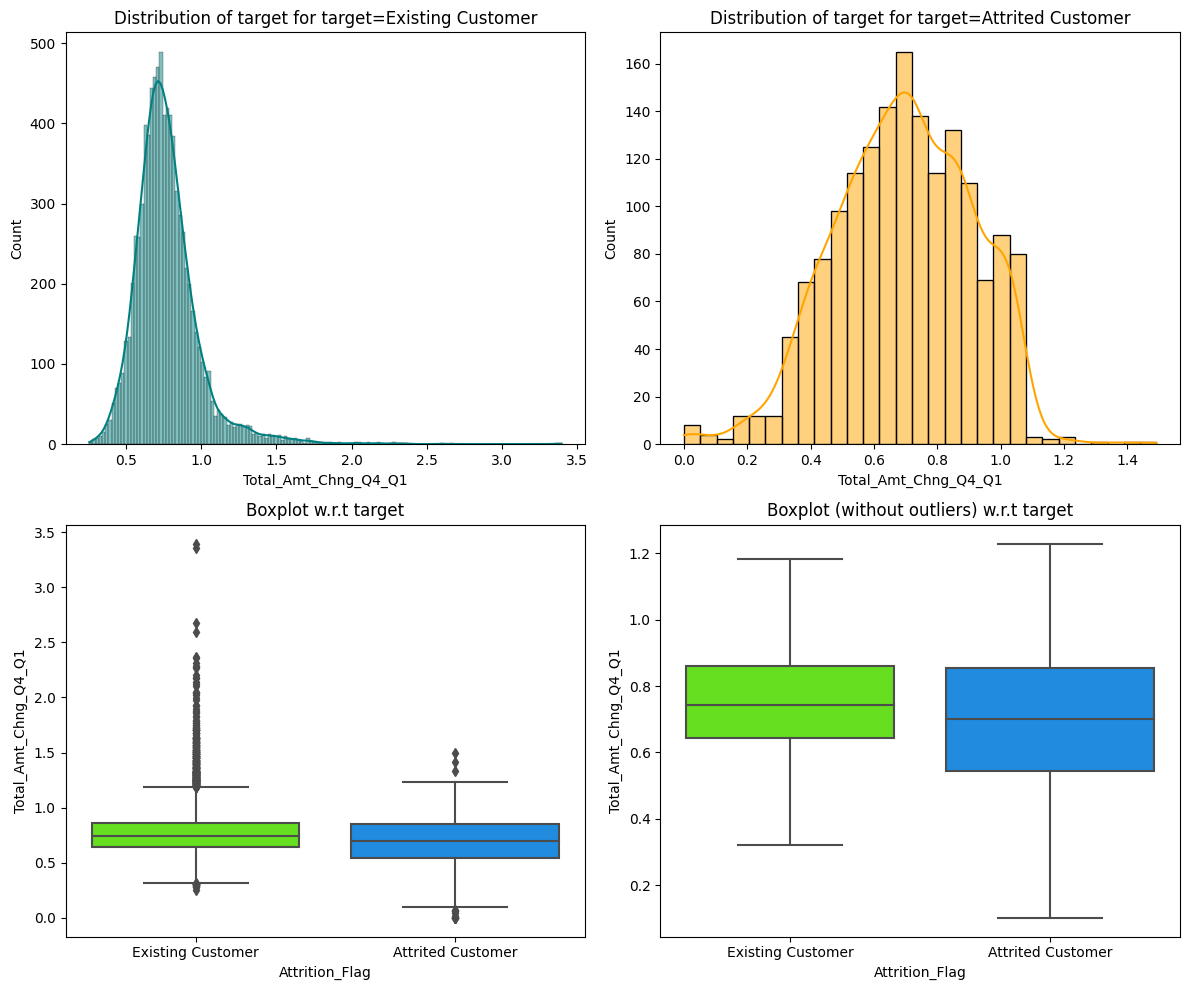

In [ ]:
distribution_plot_wrt_target(CCUsers, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

The change in transaction amount from Q4 to Q1 indicates that smaller values are associated with a higher number of attrited customers. This observation aligns with the understanding that attrited customers are reducing their credit use. In contrast, existing customers demonstrate higher usage in Q4, with outliers even reaching up to 3.5

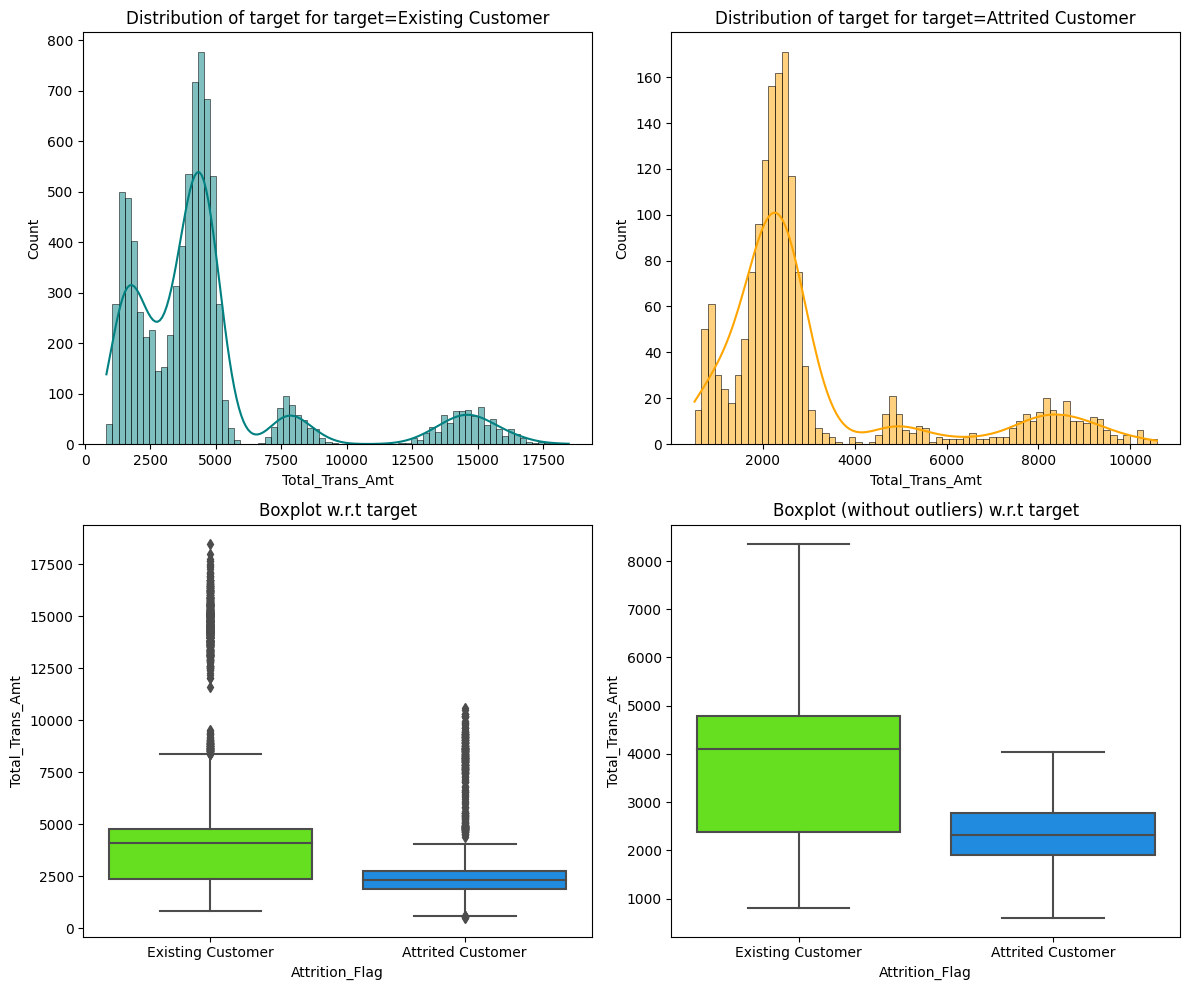

In [ ]:
distribution_plot_wrt_target(CCUsers, "Total_Trans_Amt", "Attrition_Flag")

The total transaction amount behaves similarly. Attrited customers are primarily reducing their transaction amounts, mainly within the range of 2000 to 3000. On the other hand, existing customers exhibit a broader range of expenses, indicating more varied use of their credit.

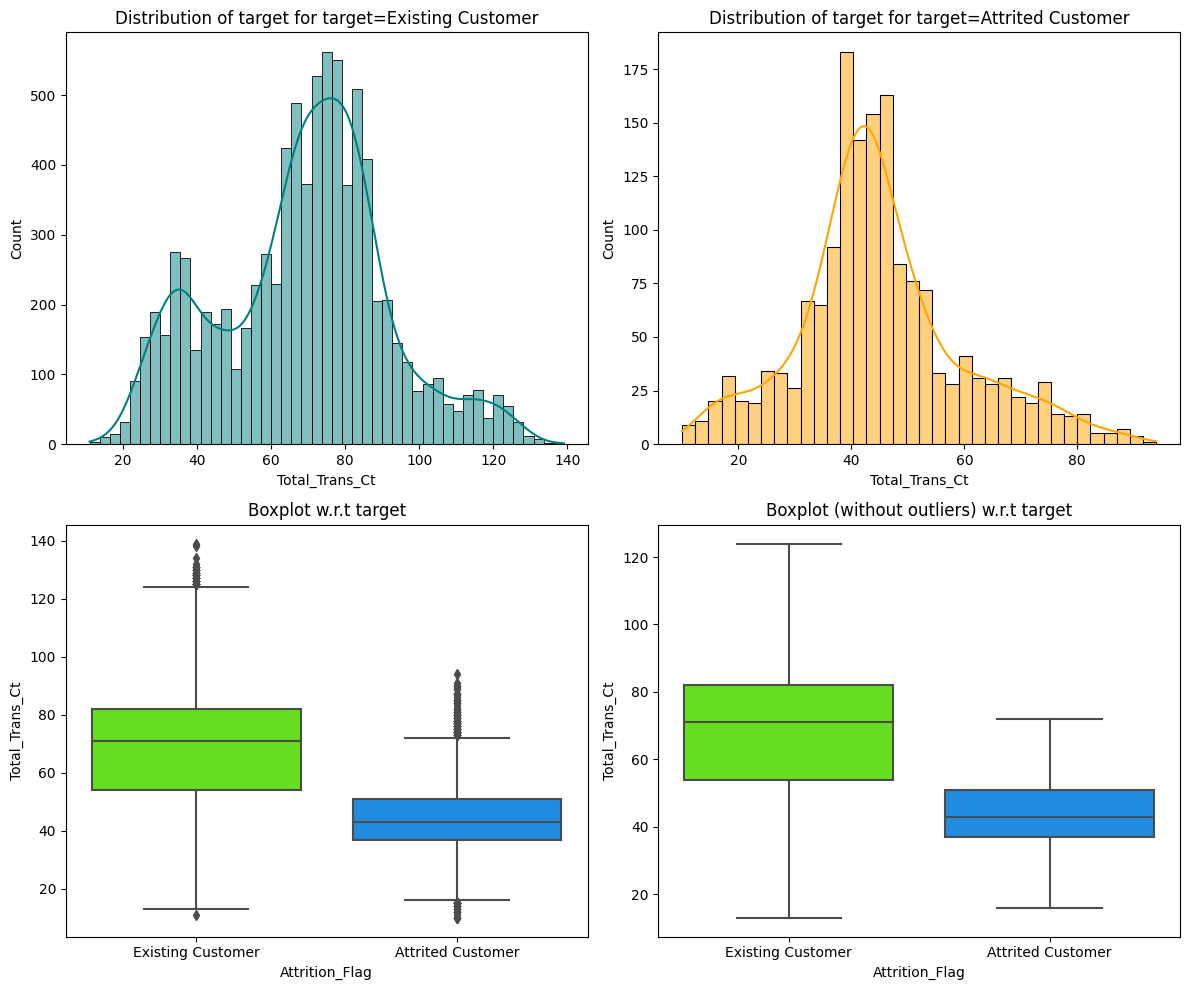

In [ ]:
distribution_plot_wrt_target(CCUsers, "Total_Trans_Ct", "Attrition_Flag")

The number of transactions also highlights that attrited customers tend to have fewer transactions compared to existing customers.

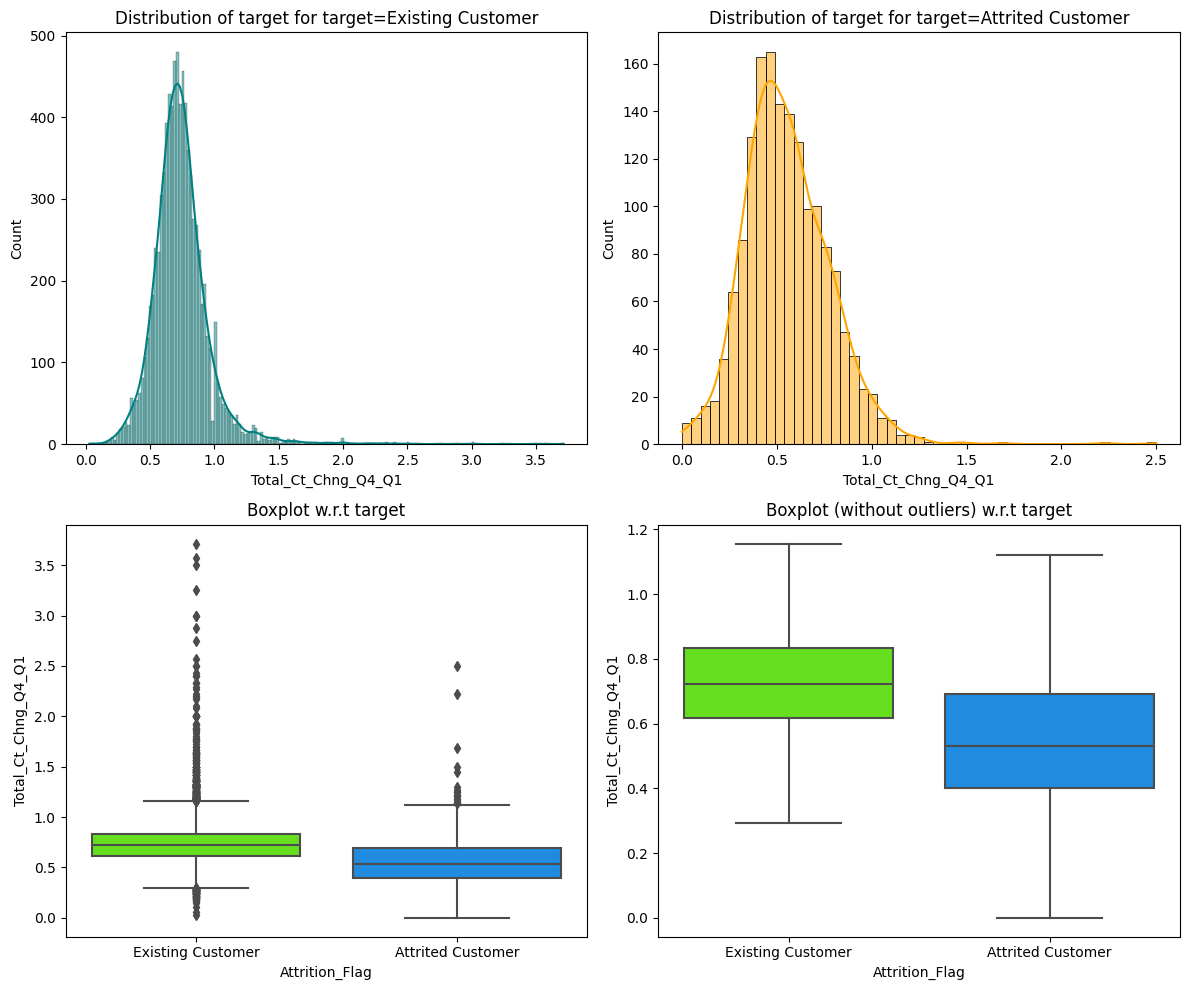

In [ ]:
distribution_plot_wrt_target(CCUsers, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

As expected, the change in the number of transactions from Q4 to Q1 shows that attrited customers have a smaller change in transaction frequency compared to existing customers.

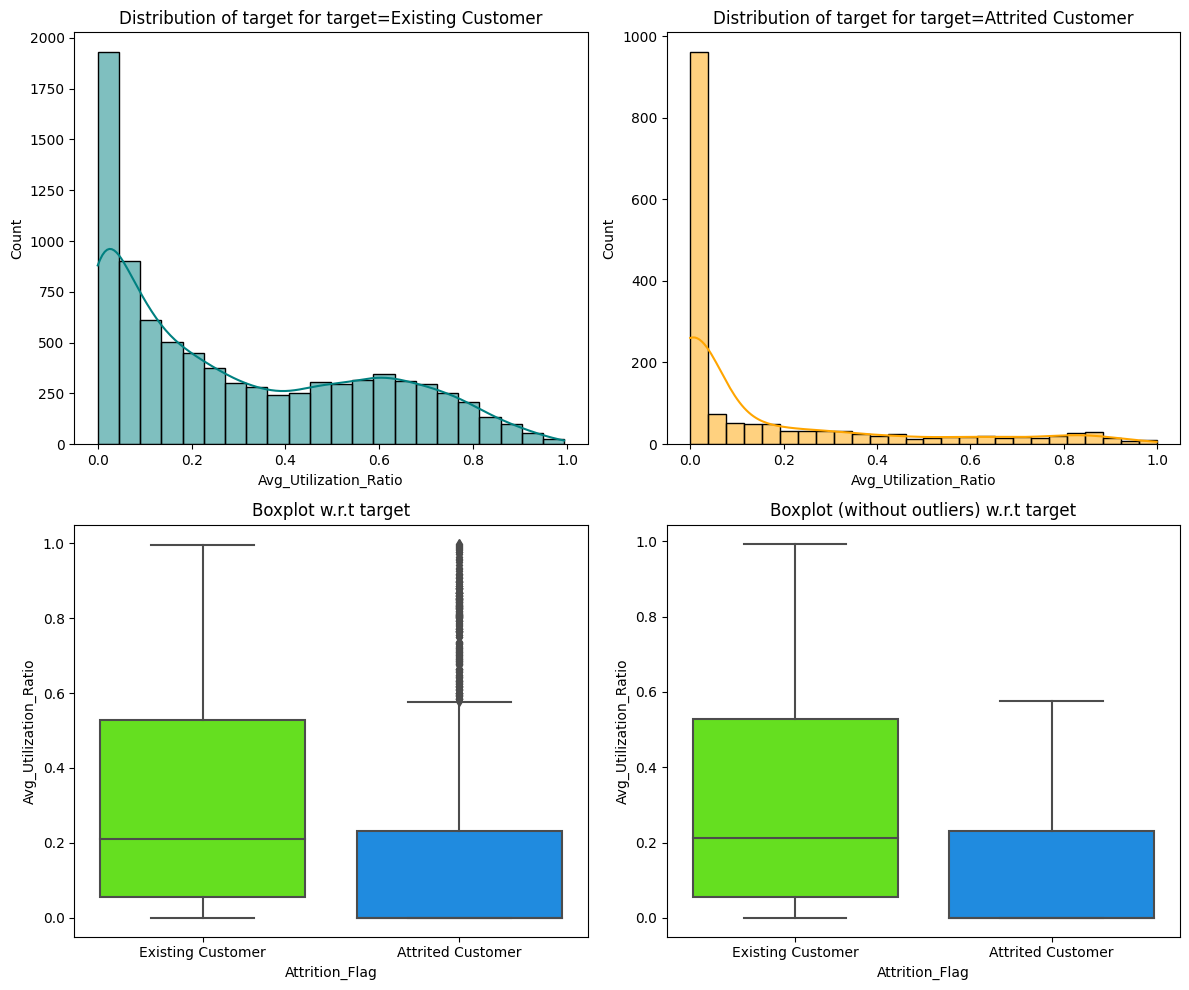

In [ ]:
distribution_plot_wrt_target(CCUsers, "Avg_Utilization_Ratio", "Attrition_Flag")

Consequently, the average utilization reveals a clear correlation. Attrited customers tend to exhibit reduced utilization compared to existing customers.

In [ ]:
## Replace Attrition_Flag 1 for Attrited and 1 for Existing to perform correlation analysis
CCUsers["Attrition_Flag"].replace("Attrited Customer",1, inplace=True) # We want to track attrition
CCUsers["Attrition_Flag"].replace("Existing Customer",0, inplace=True)
print(CCUsers["Attrition_Flag"].value_counts())

0    8500
1    1627
Name: Attrition_Flag, dtype: int64


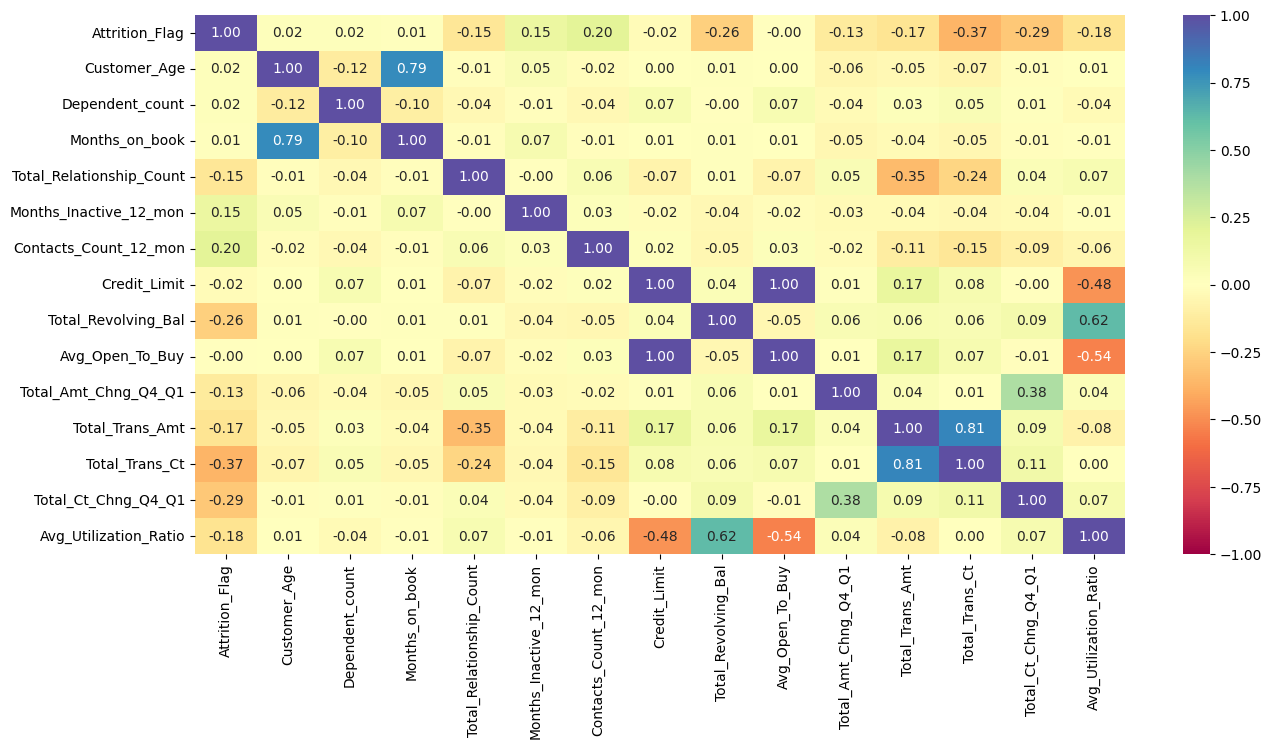

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(CCUsers.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The total transaction count, total change in transaction count from Q4 to Q1, and total revolving balance are the variables that demonstrate the strongest inverse correlation with attrition. These variables depict a clear decrease in credit usage.

Following these, the number of contacts by year, utilization ratio, and the transaction amount change from Q4 to Q1 also display an inverse correlation, further describing the patterns of credit use.

Inactive months show a positive correlation with attrition, indicating that the more inactive a customer is, the more likely they are to attrite.

The remaining categorical variables exhibit minimal correlation with attrition.

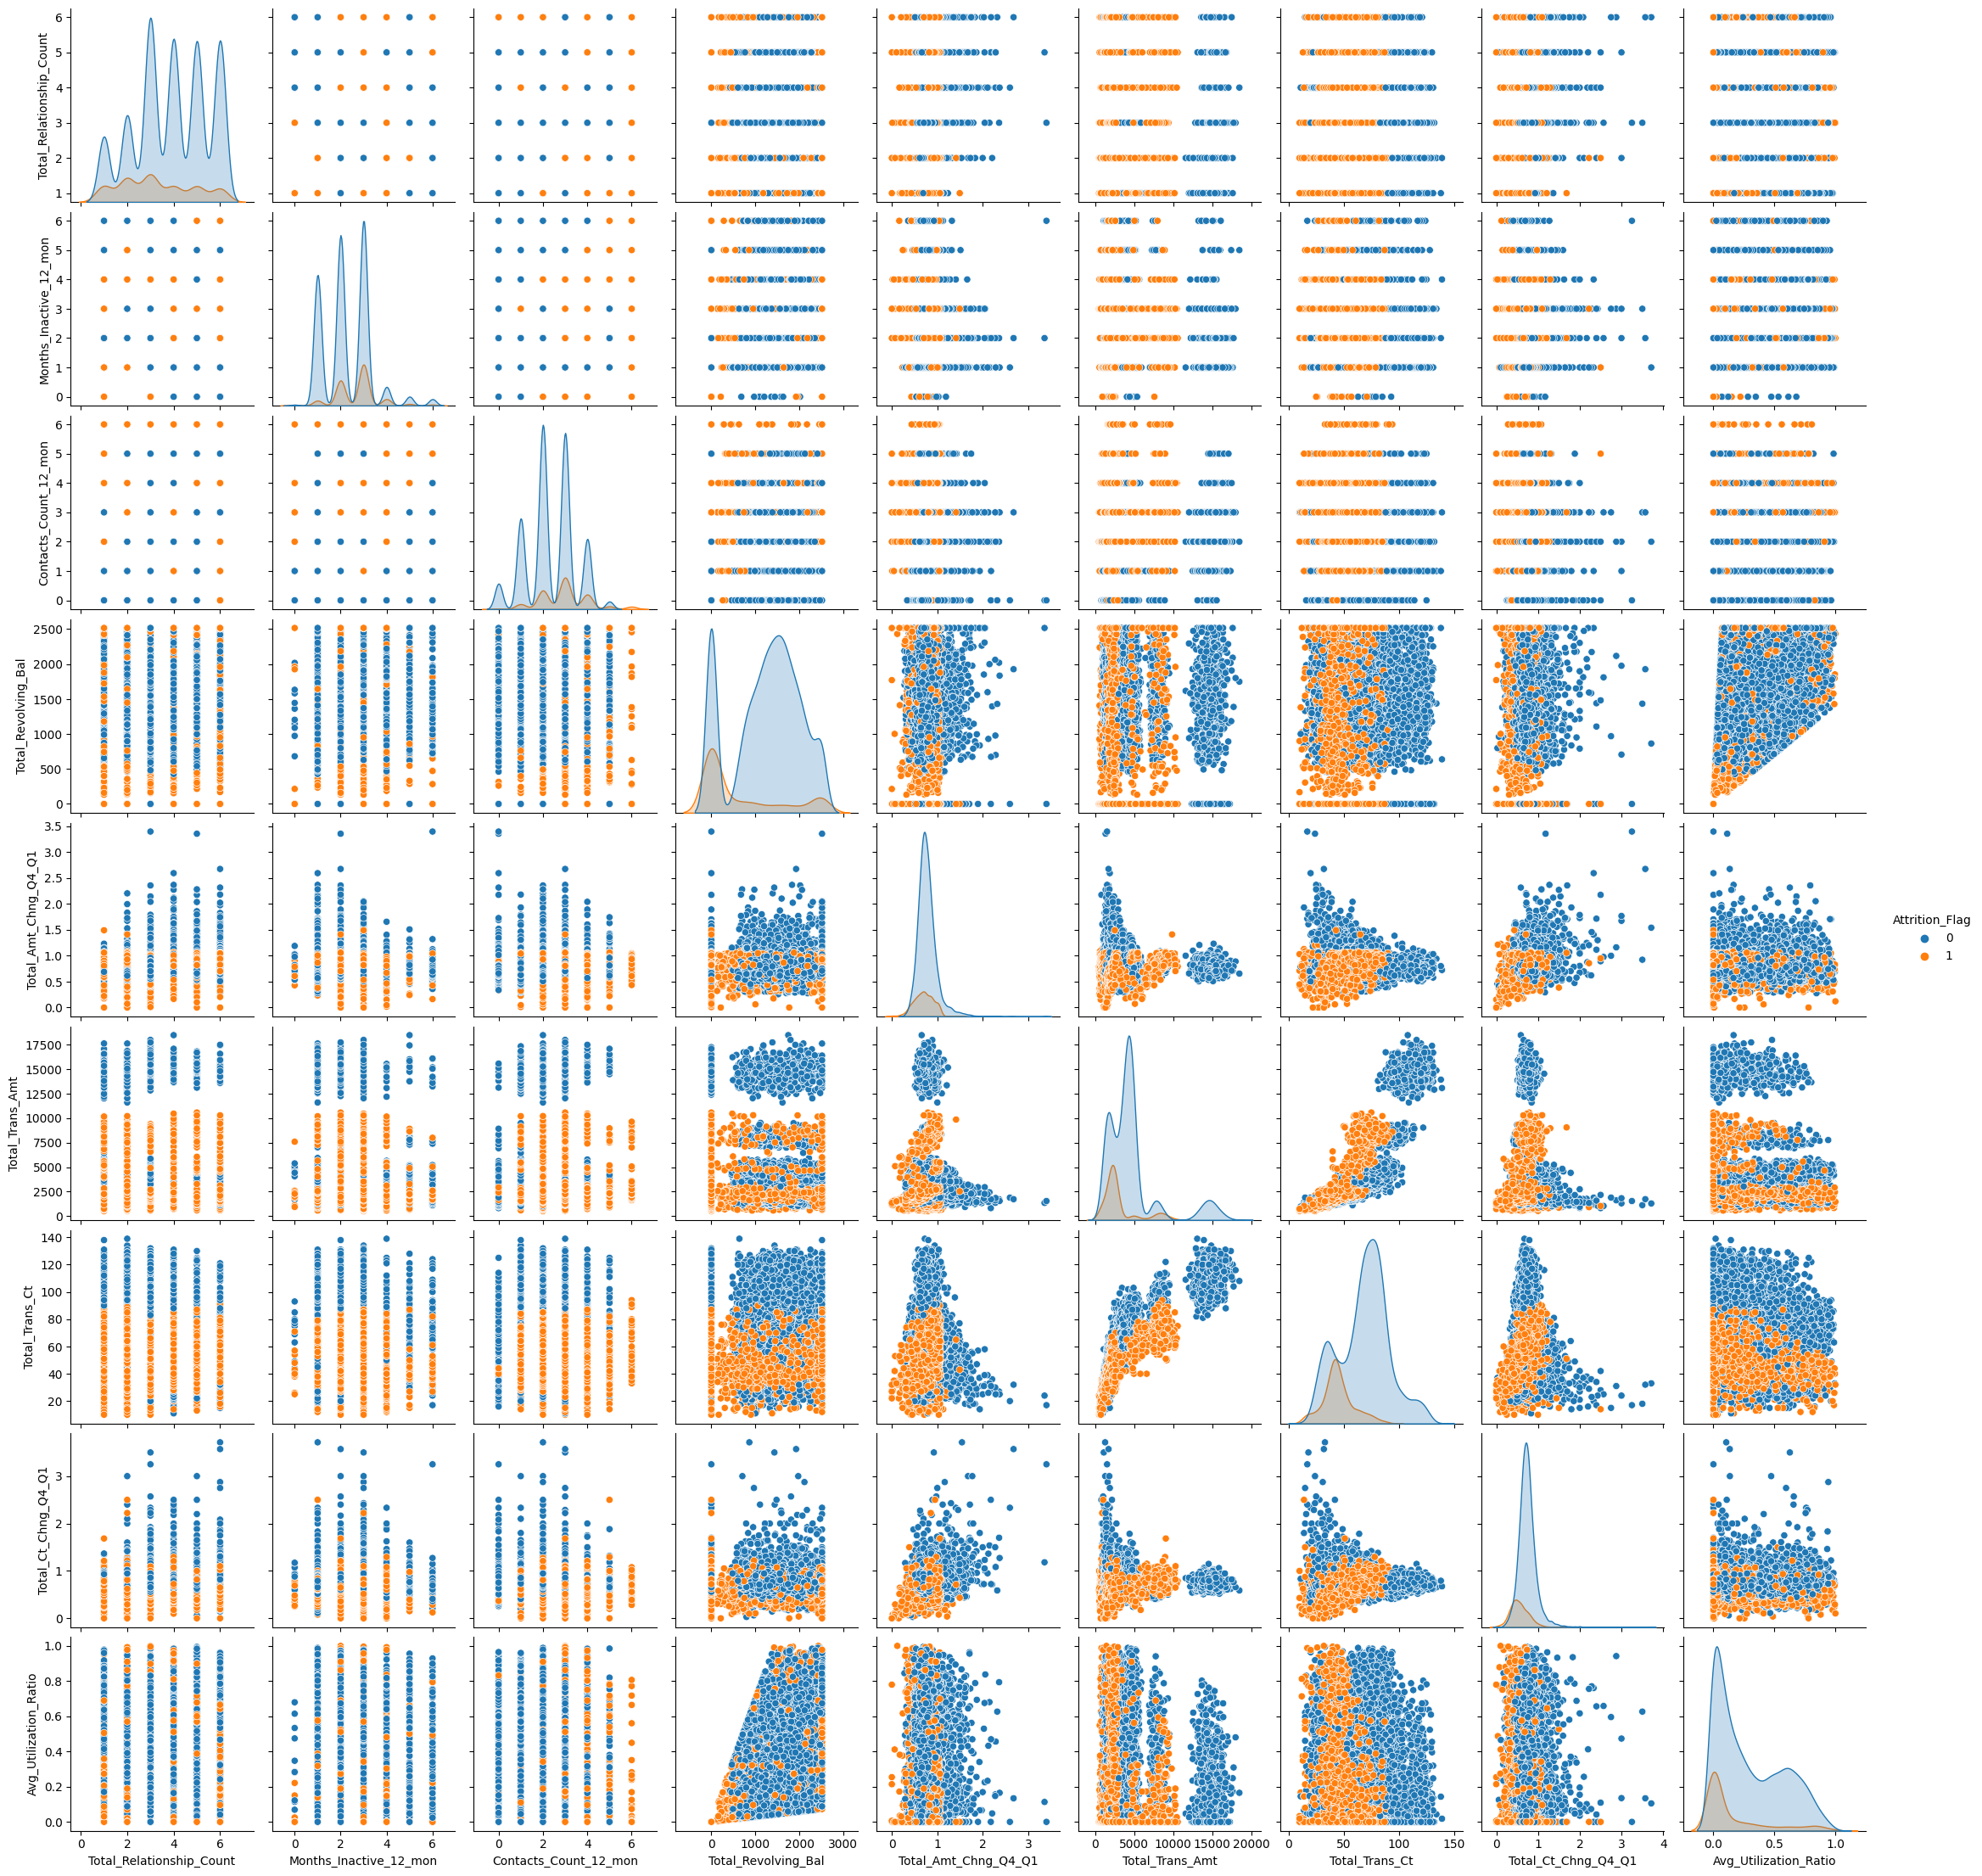

In [ ]:
sns.pairplot(data=CCUsers[['Attrition_Flag','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']], diag_kind="kde", hue='Attrition_Flag')
plt.show()

Based on the graphical representations, it is evident that attrition is concentrated primarily among customers who have low values for transaction variables. This means customers who transact less frequently or in smaller amounts are more likely to stop using their credit accounts.

**Bivariate Analysis**
* The age among both existing and attrited customers appears to be a normal distribution. We do not observe any specific correlation with attrition.
* Attrition rates show a slight discrepancy between genders, with a rate of 17.4% among women and 14.6% among men. This suggests that gender may have a minor influence on attrition
* Attrition rates peak at 17.6% for customers with three dependents, while the variation in rates is relatively minor across all other cases.
* Individuals with doctorate and post-graduate degrees represent the largest categories experiencing attrition, with rates of 21.1% and 17.8% respectively. The attrition rates for the remaining categories fluctuate between 15% and 17%. The attrition rate for the 'Unknown' category is nearly 17%, demonstrating a behavior similar to the rest of the categories.
* Individuals classified as 'Single', 'Divorced', and 'Unknown' appear to experience a slightly higher rate of attrition over 16%.
* Attrition rates exceed 17% for the income categories 'Less than 40K' and 'More than 120K'. However, the income category '60K - 80K' exhibits the lowest attrition rate at 13.5%.
* While the 'Platinum' and 'Gold' credit card categories exhibit higher attrition rates, it's important to note that these categories constitute less than 1.3% of the total.
* The distribution of 'Months on Book' remains consistent between attrited and existing customers.
* Customers with one or two products exhibit an attrition rate higher than 25%, while those with six products show an attrition rate of 10%. The graph indicates a trend where attrition decreases as the number of products a customer has increases.
* Attrition is notably high at 51% for customers who have been inactive for less than a month, while it falls to 30% for those inactive for four months and further drops to 4.5% for those inactive for one month. Rather than a consistent trend, these figures seem to reflect specific situations.
* The number of contacts presents a clear trend. Customers with no contact have an attrition rate of 1.8%, and this rate consistently rises to 100% attrition for customers with more than six contacts. However, it's important to note that customers with six contacts constitute less than 0.5% of the overall customer base.
* The credit limit does not demonstrate any significant differences between attrited and existing customers, and it includes several outliers.
* The revolving balance of attrited customers is primarily concentrated between 0 and 1500, whereas for existing customers, it's concentrated between 1000 and 2000. This observation indicates a correlation between revolving balance and customer attrition.
* The 'Open to Buy' on the credit line exhibits a similar behavior for both attrited and existing customers.
* The change in transaction amount from Q4 to Q1 indicates that smaller values are associated with a higher number of attrited customers. This observation aligns with the understanding that attrited customers are reducing their credit use. In contrast, existing customers demonstrate higher usage in Q4, with outliers even reaching up to 3.5
* The total transaction amount behaves similarly. Attrited customers are primarily reducing their transaction amounts, mainly within the range of 2000 to 3000. On the other hand, existing customers exhibit a broader range of expenses, indicating more varied use of their credit.
* The number of transactions also highlights that attrited customers tend to have fewer transactions compared to existing customers.
* As expected, the change in the number of transactions from Q4 to Q1 shows that attrited customers have a smaller change in transaction frequency compared to existing customers.
* Consequently, the average utilization reveals a clear correlation. Attrited customers tend to exhibit reduced utilization compared to existing customers.
* The total transaction count, total change in transaction count from Q4 to Q1, and total revolving balance are the variables that demonstrate the strongest inverse correlation with attrition. These variables depict a clear decrease in credit usage. Following these, the number of contacts by year, utilization ratio, and the transaction amount change from Q4 to Q1 also display an inverse correlation, further describing the patterns of credit use. Inactive months show a positive correlation with attrition, indicating that the more inactive a customer is, the more likely they are to attrite.The remaining categorical variables exhibit minimal correlation with attrition.


## Data Pre-processing

In [ ]:
DataPreCCUsers=CCUsers.copy()

In [ ]:
# Transform gender to numerical values
gender={"F": 0, "M": 1}
DataPreCCUsers["Gender"]=DataPreCCUsers["Gender"].map(gender)

In [ ]:
# Transform Education Level to numerical values

education_level={
  "Unknown":None,
  "Uneducated":1,
  "College":2,
  "High School": 3,
  "Graduate": 4,
  "Post-Graduate": 5,
  "Doctorate":6,
}
DataPreCCUsers["Education_Level"]=DataPreCCUsers["Education_Level"].map(education_level)

In [ ]:
# Transform Marital Status to numerical values

marital_status={
"Unknown":None,
"Married":1,
"Single":2,
"Divorced":3,
}
DataPreCCUsers["Marital_Status"]=DataPreCCUsers["Marital_Status"].map(marital_status)

In [ ]:
# Transform Income_Category to numerical values

Income_Category={
"Unknown":None,
"Less than $40K":1,
"$40K - $60K":2,
"$60K - $80K":3,
"$80K - $120K":4,
"$120K +":5,
}
DataPreCCUsers["Income_Category"]=DataPreCCUsers["Income_Category"].map(Income_Category)

In [ ]:
# Transform Card_Category to numerical values

Card_Category={
"Blue":1,
"Silver":2,
"Gold":3,
"Platinum":4,
}
DataPreCCUsers["Card_Category"]=DataPreCCUsers["Card_Category"].map(Card_Category)

In [ ]:
DataPreCCUsers.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3            3.000   
1               0            49       0                5            4.000   
2               0            51       1                3            4.000   
3               0            40       0                4            3.000   
4               0            40       1                3            1.000   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0           1.000            3.000              1              39   
1           2.000            1.000              1              44   
2           1.000            4.000              1              36   
3             NaN            1.000              1              34   
4           1.000            3.000              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Missing value imputation




In [ ]:
X=DataPreCCUsers.drop("Attrition_Flag", axis=1)
y=DataPreCCUsers.pop("Attrition_Flag")

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split( X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
DataPreCCUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           8608 non-null   float64
 4   Marital_Status            9378 non-null   float64
 5   Income_Category           9015 non-null   float64
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [ ]:
DataPreCCUsers.isnull().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# Impute numerical columns
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

num_imputer = SimpleImputer(strategy='most_frequent') #we will use most frequent because these variables are categories
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

Our primary aim is to accurately predict customer attrition, with a strong emphasis on identifying True Positives. We work hard to reduce False Negatives, ensuring that we proactively detect all potential cases of attrition. While False Positives also play a role, they are less critical in our analysis; however, maintaining a low count helps us avoid reaching out to customers who have no intention of discontinuing their services. As a result, we will use Recall as the primary measure of our performance in this task.


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models
DataScores=pd.DataFrame(columns=['Name', 'TrainRecall','ValidationRecall','Dif']) #Frame for recall results

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

index=0
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    DataScores.at[index,'Name'] = name
    DataScores.at[index,'TrainRecall'] = scores
    scores_val = recall_score(y_val, model.predict(X_val))
    DataScores.at[index,'ValidationRecall'] = scores_val
    DataScores.at[index,'Dif']=scores-scores_val
    index+=1

print(DataScores)

            Name TrainRecall ValidationRecall    Dif
0        Bagging       0.983            0.816  0.167
1  Random forest       1.000            0.831  0.169
2            GBM       0.881            0.859  0.022
3       Adaboost       0.847            0.877 -0.030
4        Xgboost       1.000            0.883  0.117
5          dtree       1.000            0.801  0.199


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
print('Before Oversampling:\n', y_train.value_counts())
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('After Oversampling:\n', y_train_over.value_counts())


Before Oversampling:
 0    5099
1     976
Name: Attrition_Flag, dtype: int64
After Oversampling:
 0    5099
1    5099
Name: Attrition_Flag, dtype: int64


In [ ]:
models = []  # Empty list to store all the models
DataScores=pd.DataFrame(columns=['Name', 'TrainRecall','ValidationRecall','Dif']) #Frame for recall results

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

index=0
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    DataScores.at[index,'Name'] = name
    DataScores.at[index,'TrainRecall'] = scores
    scores_val = recall_score(y_val, model.predict(X_val))
    DataScores.at[index,'ValidationRecall'] = scores_val
    DataScores.at[index,'Dif']=scores-scores_val
    index+=1

print(DataScores)


            Name TrainRecall ValidationRecall   Dif
0        Bagging       0.999            0.831 0.167
1  Random forest       1.000            0.856 0.144
2            GBM       0.982            0.899 0.083
3       Adaboost       0.969            0.893 0.076
4        Xgboost       1.000            0.896 0.104
5          dtree       1.000            0.810 0.190


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
print('Before Undersampling:\n', y_train.value_counts())
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print('After Undersampling:\n', y_train_un.value_counts())

Before Undersampling:
 0    5099
1     976
Name: Attrition_Flag, dtype: int64
After Undersampling:
 0    976
1    976
Name: Attrition_Flag, dtype: int64


In [ ]:
models = []  # Empty list to store all the models
DataScores=pd.DataFrame(columns=['Name', 'TrainRecall','ValidationRecall','Dif']) #Frame for recall results

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

index=0
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    DataScores.at[index,'Name'] = name
    DataScores.at[index,'TrainRecall'] = scores
    scores_val = recall_score(y_val, model.predict(X_val))
    DataScores.at[index,'ValidationRecall'] = scores_val
    DataScores.at[index,'Dif']=scores-scores_val
    index+=1

print(DataScores)

            Name TrainRecall ValidationRecall    Dif
0        Bagging       0.991            0.920  0.071
1  Random forest       1.000            0.939  0.061
2            GBM       0.980            0.963  0.016
3       Adaboost       0.953            0.960 -0.007
4        Xgboost       1.000            0.960  0.040
5          dtree       1.000            0.917  0.083


It is evident that there's a significant improvement when using undersampled data. The Gradient Boosting Model (GBM), AdaBoost, and XGBoost are reaching a recall of 96%, which is higher than what we observed with oversampled and original data. Given these results, we will proceed to fine-tune these three models using the undersampled data set.

### HyperparameterTuning

#### Sample tuning method for Gradient Boosting with undersampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9498011512297226:
CPU times: user 2.07 s, sys: 242 ms, total: 2.31 s
Wall time: 1min 12s


In [ ]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_train_un, y_train_un)
gbm_train

Accuracy  Recall  Precision    F1
0     0.976   0.984      0.969 0.976

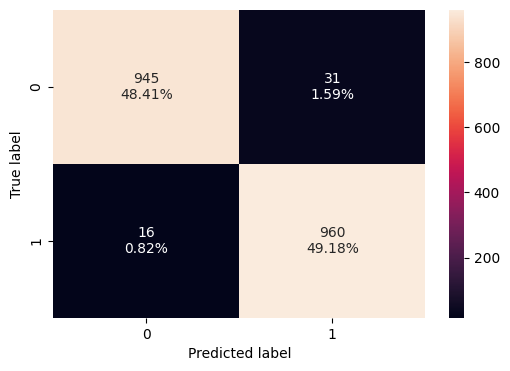

In [ ]:
confusion_matrix_sklearn(tuned_gbm, X_train_un, y_train_un)

In [ ]:
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

Accuracy  Recall  Precision    F1
0     0.940   0.966      0.741 0.839

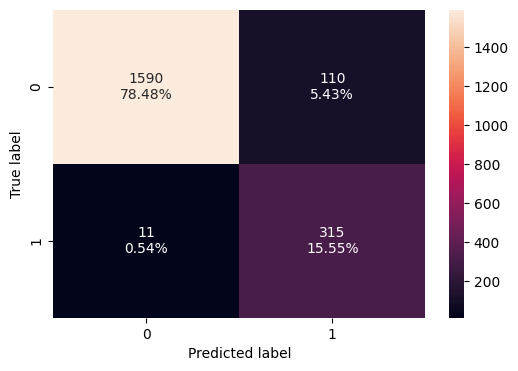

In [ ]:
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

#### Sample tuning method for AdaBoostClassifier with undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.943657770800628:
CPU times: user 1.37 s, sys: 92.5 ms, total: 1.46 s
Wall time: 39.4 s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

Accuracy  Recall  Precision    F1
0     0.973   0.978      0.968 0.973

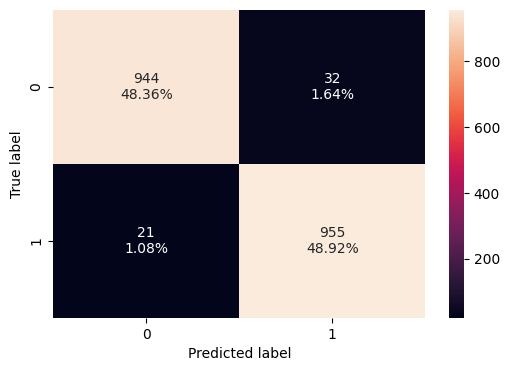

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_train_un, y_train_un)

In [ ]:
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

Accuracy  Recall  Precision    F1
0     0.937   0.966      0.731 0.832

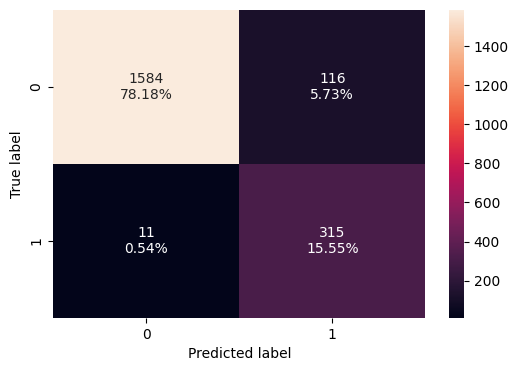

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

#### Sample tuning method XGBoost Classifier with undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:


In [ ]:
tuned_XGB = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    learning_rate=0.01,
    gamma=3,
    subsample=0.7,
    eval_metric='logloss',
)
tuned_XGB.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on training set
XGB_train = model_performance_classification_sklearn(tuned_XGB, X_train_un, y_train_un)
XGB_train

Accuracy  Recall  Precision    F1
0     0.762   1.000      0.678 0.808

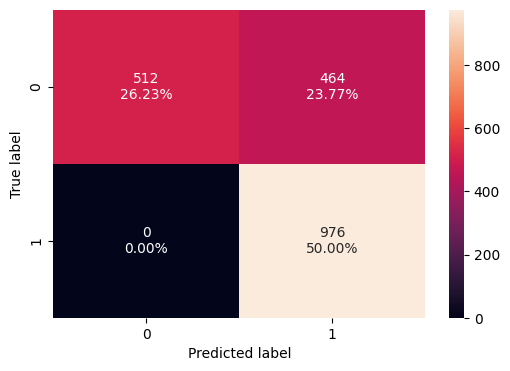

In [ ]:
confusion_matrix_sklearn(tuned_XGB, X_train_un, y_train_un)

In [ ]:
XGB_val = model_performance_classification_sklearn(tuned_XGB, X_val, y_val)
XGB_val

Accuracy  Recall  Precision    F1
0     0.582   1.000      0.278 0.435

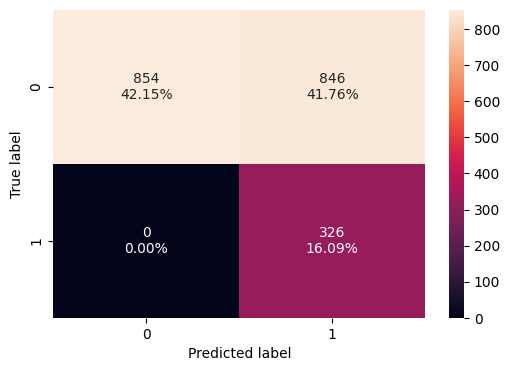

In [ ]:
confusion_matrix_sklearn(tuned_XGB, X_val, y_val)

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train.T,
        adb_train.T,
        XGB_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
"Gradient Boosting with undersampled data",
"AdaBoostClassifier with undersampled data",
"XGBoost Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boosting with undersampled data  \
Accuracy                                      0.976   
Recall                                        0.984   
Precision                                     0.969   
F1                                            0.976   

           AdaBoostClassifier with undersampled data  \
Accuracy                                       0.973   
Recall                                         0.978   
Precision                                      0.968   
F1                                             0.973   

           XGBoost Classifier with undersampled data  
Accuracy                                       0.762  
Recall                                         1.000  
Precision                                      0.678  
F1                                             0.808

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_val.T,
        adb_val.T,
        XGB_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
"Gradient Boosting with undersampled data",
"AdaBoostClassifier with undersampled data",
"XGBoost Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Gradient Boosting with undersampled data  \
Accuracy                                      0.940   
Recall                                        0.966   
Precision                                     0.741   
F1                                            0.839   

           AdaBoostClassifier with undersampled data  \
Accuracy                                       0.937   
Recall                                         0.966   
Precision                                      0.731   
F1                                             0.832   

           XGBoost Classifier with undersampled data  
Accuracy                                       0.582  
Recall                                         1.000  
Precision                                      0.278  
F1                                             0.435

While the XGBoost model provides a perfect recall of 1, it unfortunately leads to a high number of False Positives, which means we might end up contacting customers who have no intention of discontinuing their services. Both AdaBoost and GBM yield the same recall, but GBM slightly outperforms AdaBoost in terms of accuracy and generates fewer False Positives. Therefore, we recommend GBM as the optimal model to consider.

### Test set final performance

In [ ]:
ada_test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
ada_test

Accuracy  Recall  Precision    F1
0     0.939   0.969      0.736 0.837

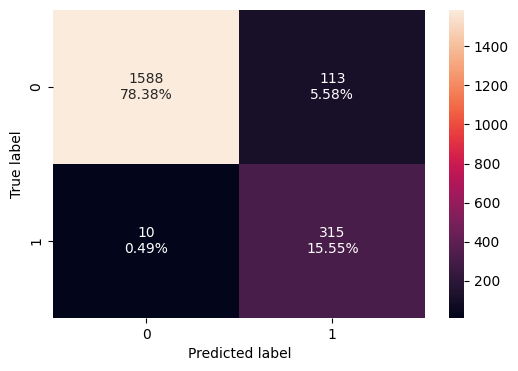

In [ ]:
confusion_matrix_sklearn(tuned_gbm, X_test, y_test)

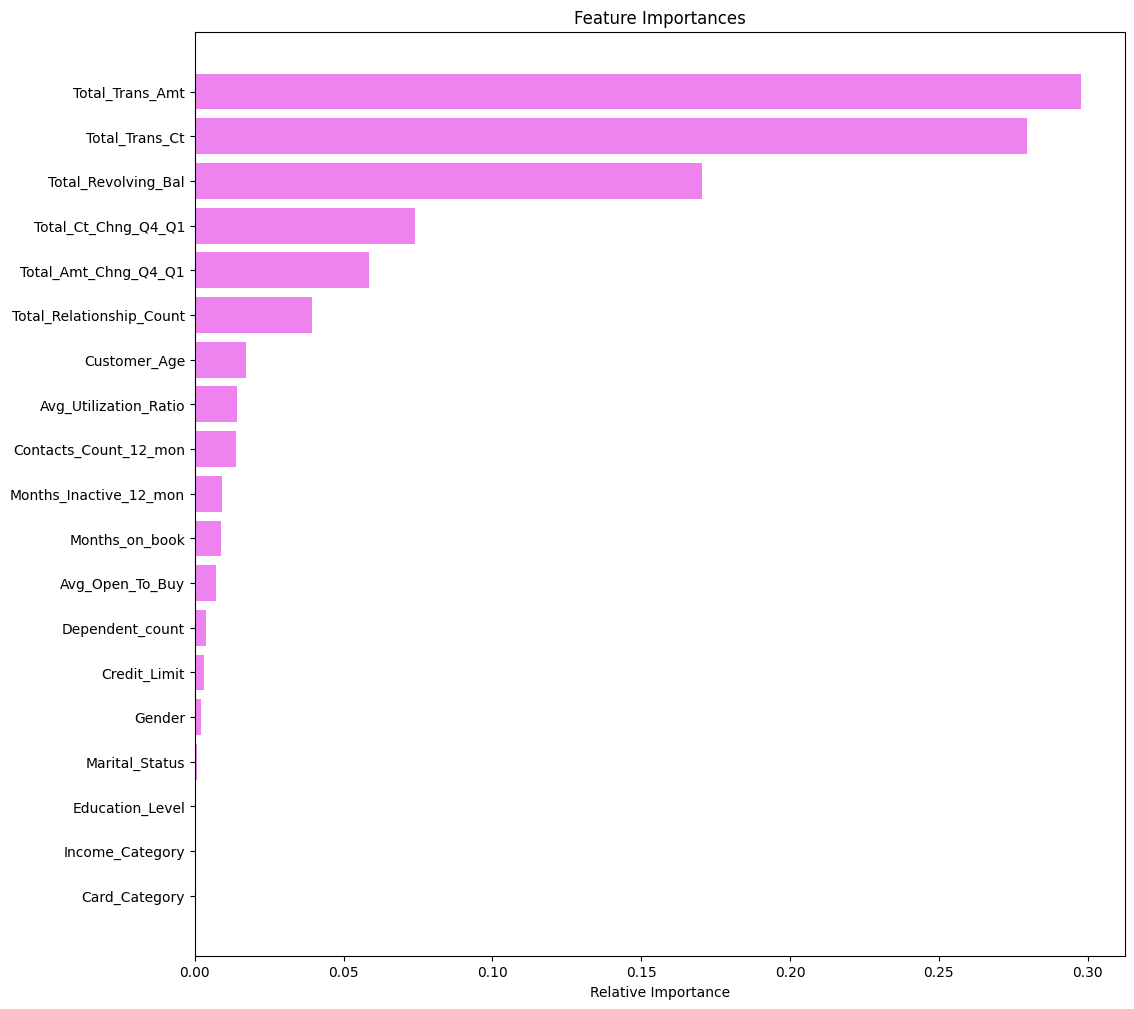

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

* The model aligns well with our Exploratory Data Analysis (EDA), as evidenced in the chart 'Feature Importances', which showcases total transaction count and amount. It also illustrates the shift in transactions from Q4 to Q1. These metrics effectively display the behavior of a customer who is gradually reducing their credit usage over time. In light of these findings, we recommend enhancing the monitoring of customer transactions by shortening the tracking period. Comparing sequential quarters, such as Q2 against Q1, and continuing this trend throughout the year, can provide us with more timely data. This will enable us to anticipate customer behavior more accurately and implement effective strategies to prevent attrition.
* The variables of contacts over the year and months on book have also been identified in the EDA and considered by the model, actions can be triggered based on these variables. Other factors such as customer age, gender, and the number of dependents may indicate that certain customers are more likely to leave. Filtering these patterns according to attrition level allows us to offer targeted promotions to retain these customers.
* We've noticed a significant inconsistency between the income category and card category. These two categories seem to be unrelated and show no apparent connection to attrition, which is unexpected. We would typically anticipate that higher income customers would be associated with more prestigious card categories and receive better benefits, thereby keeping attrition low. Unfortunately, our data does not support this assumption. This discrepancy may present an opportunity for improvement. By aligning card benefits more closely with income levels, we may be able to enhance customer satisfaction and reduce attrition.